In [0]:
# !pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
#   !pip3 install torchvision
# !pip install tensorboardX

In [0]:
import torch
from torch import nn,optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
# from utils import Logger

In [4]:

def mnist_data():
  compose = transforms.Compose([transforms.ToTensor(),transforms.Normalize((.5,.5,.5),(.5,.5,.5))])
  out_dir = './dataset'
  return datasets.MNIST(root=out_dir,train=True,transform=compose,download=True)

data = mnist_data()


Processing...
Done!


In [0]:
data_loader = torch.utils.data.DataLoader(data,batch_size=100,shuffle=True)
num_batches = len(data_loader) 

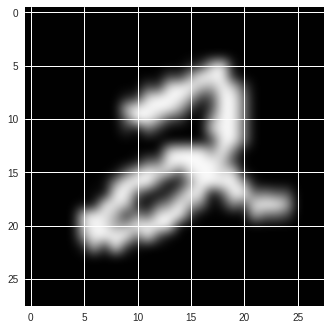

In [28]:
import matplotlib.pyplot as plt 
one = data[5][0]
plt.imshow(transforms.ToPILImage()(one), interpolation="bicubic")


In [0]:
#coding the discriminator Network 

class DiscriminatorNet(torch.nn.Module):
  '''three hidden layer discriminator neural network'''
  def __init__(self):
    super(DiscriminatorNet,self).__init__()
    n_features = 784
    n_out = 1 
    
    self.hidden0 = nn.Sequential(
        nn.Linear(n_features,1024),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3)
    )
    self.hidden1 = nn.Sequential(
        nn.Linear(1024,512),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3)
    )
    self.hidden2 = nn.Sequential(
        nn.Linear(512,256),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3)
    ) 
    self.out = nn.Sequential(
        torch.nn.Linear(256,n_out),
        torch.nn.Sigmoid()
    )
  def forward(self,x):
    x = self.hidden0(x)
    x = self.hidden1(x)
    x = self.hidden2(x)
    x = self.out(x)
    return x 

discriminator = DiscriminatorNet()

# if(torch.cuda.is_available()):
#   discriminator = discriminator.cuda()
    
    
    
    
    
    

In [0]:
class GeneratorNet(nn.Module):
  def __init__(self):
    super(GeneratorNet,self).__init__()
    n_features = 100
    n_out = 784
    
    self.hidden0 = nn.Sequential(
      nn.Linear(n_features,256),
      nn.LeakyReLU(0.2)     
    )
    self.hidden1 = nn.Sequential(
      nn.Linear(256,512),
      nn.LeakyReLU(0.2)     
    )
    self.hidden2 = nn.Sequential(
      nn.Linear(512,1024),
      nn.LeakyReLU(0.2)     
    )
    self.out = nn.Sequential(
      nn.Linear(1024,n_out),
      nn.Tanh()    
    )
  def forward(self,x):
    x = self.hidden0(x)
    x = self.hidden1(x)
    x = self.hidden2(x)
    x = self.out(x)
    return x 
generator = GeneratorNet()

# if(torch.cuda.is_available()):
#   generator = generator.cuda()
 
    

In [0]:
def images_to_vectors(images):
  return images.view(images.size(0),784)

def vectors_to_images(vectors):
  return vectors.view(vectors.size(0),1,28,28)



In [0]:
from torch import optim
def noise(size):
  n = Variable(torch.randn(size,100))
  return n

loss = nn.BCELoss()

g_optimizer = optim.Adam(generator.parameters(),lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(),lr=0.0002)


In [0]:
def ones_target(size):
  data=Variable(torch.ones(size,1))
  return data
def zeros_target(size):
  data = Variable(torch.zeros(size,1))
  return data 

In [0]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
#     print(ones_target(N))
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [0]:
def train_generator(optimizer,fake_data):
  N=fake_data.size(0)
  optimizer.zero_grad()
  prediction=discriminator(fake_data)
  error=loss(prediction,ones_target(N))
  error.backward()
  optimizer.step()
  return error

In [0]:
num_test_samples = 16
test_noise = noise(num_test_samples)

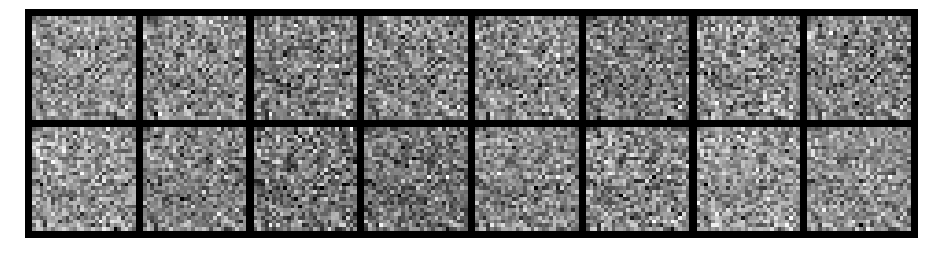

Epoch: [0/200], Batch Num: [0/600]
Discriminator Loss: 1.3698, Generator Loss: 0.7124
D(x): 0.4993, D(G(z)): 0.4907


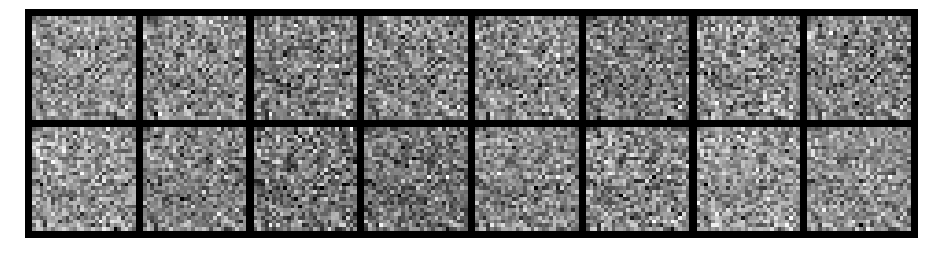

Epoch: [0/200], Batch Num: [100/600]
Discriminator Loss: 1.3688, Generator Loss: 0.7124
D(x): 0.4996, D(G(z)): 0.4905


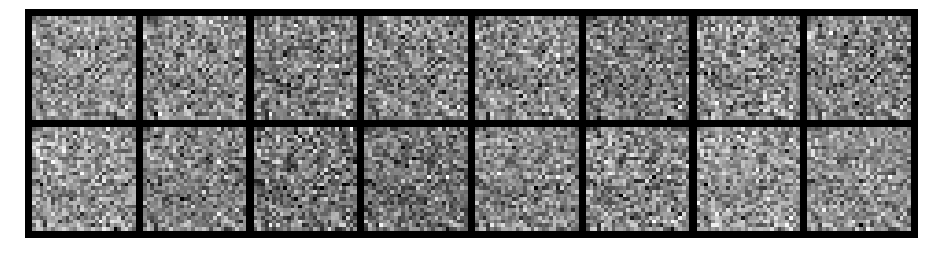

Epoch: [0/200], Batch Num: [200/600]
Discriminator Loss: 1.3737, Generator Loss: 0.7125
D(x): 0.4971, D(G(z)): 0.4905


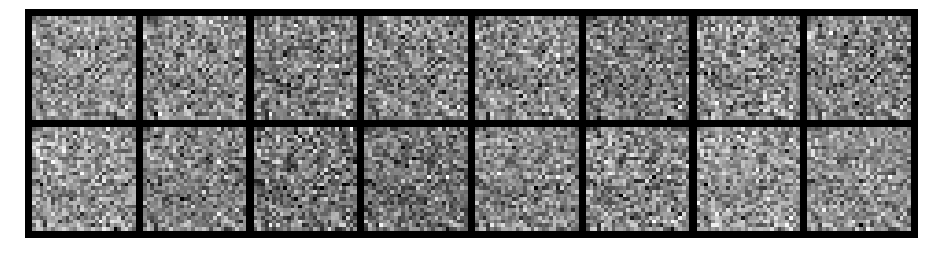

Epoch: [0/200], Batch Num: [300/600]
Discriminator Loss: 1.3713, Generator Loss: 0.7119
D(x): 0.4985, D(G(z)): 0.4908


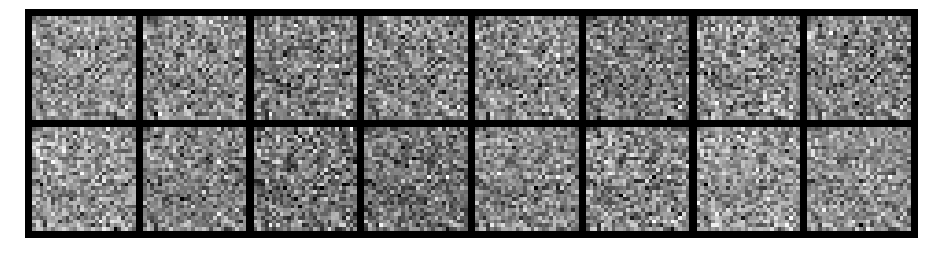

Epoch: [0/200], Batch Num: [400/600]
Discriminator Loss: 1.3646, Generator Loss: 0.7119
D(x): 0.5016, D(G(z)): 0.4905


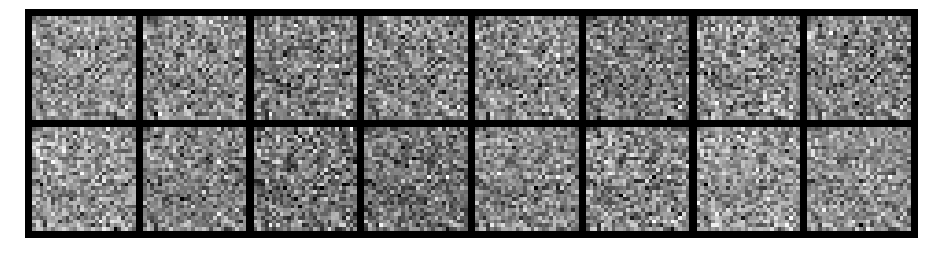

Epoch: [0/200], Batch Num: [500/600]
Discriminator Loss: 1.3656, Generator Loss: 0.7129
D(x): 0.5011, D(G(z)): 0.4905


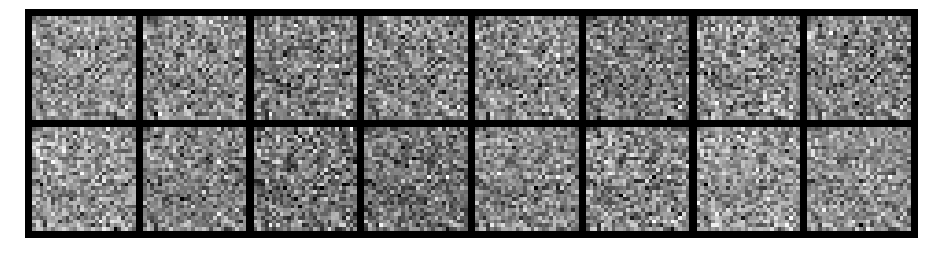

Epoch: [1/200], Batch Num: [0/600]
Discriminator Loss: 1.3755, Generator Loss: 0.7121
D(x): 0.4961, D(G(z)): 0.4905


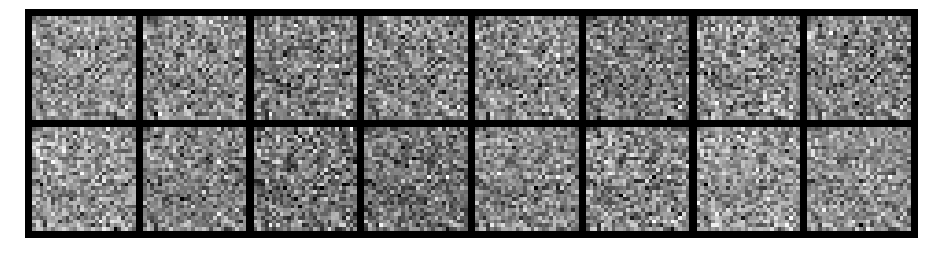

Epoch: [1/200], Batch Num: [100/600]
Discriminator Loss: 1.3733, Generator Loss: 0.7116
D(x): 0.4973, D(G(z)): 0.4905


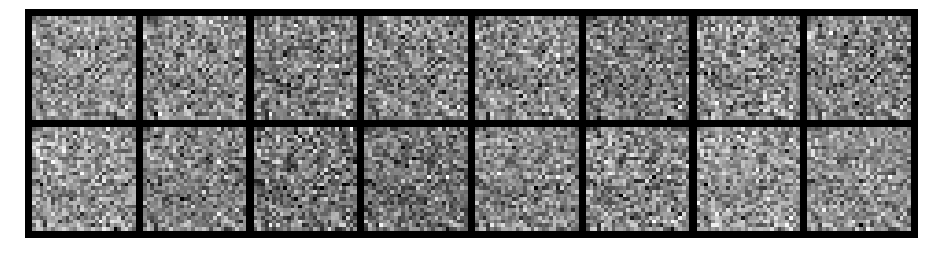

Epoch: [1/200], Batch Num: [200/600]
Discriminator Loss: 1.3678, Generator Loss: 0.7128
D(x): 0.5002, D(G(z)): 0.4907


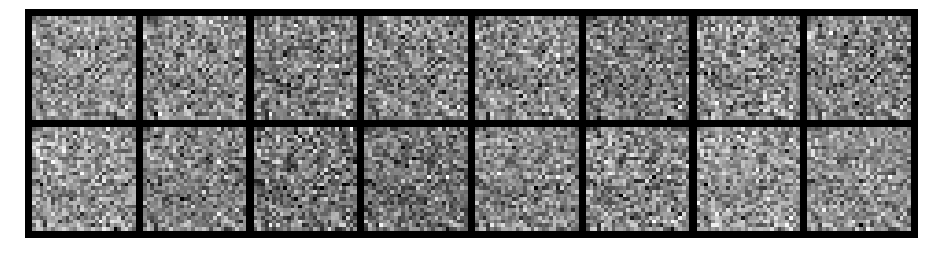

Epoch: [1/200], Batch Num: [300/600]
Discriminator Loss: 1.3735, Generator Loss: 0.7121
D(x): 0.4975, D(G(z)): 0.4908


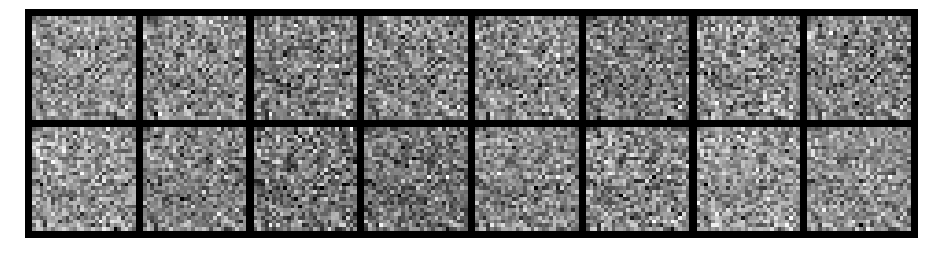

Epoch: [1/200], Batch Num: [400/600]
Discriminator Loss: 1.3693, Generator Loss: 0.7123
D(x): 0.4994, D(G(z)): 0.4906


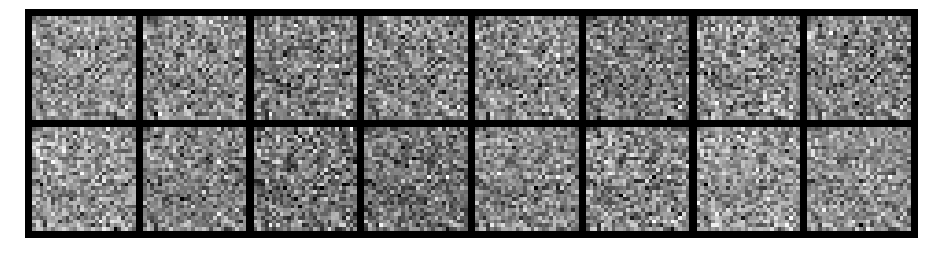

Epoch: [1/200], Batch Num: [500/600]
Discriminator Loss: 1.3661, Generator Loss: 0.7120
D(x): 0.5009, D(G(z)): 0.4904


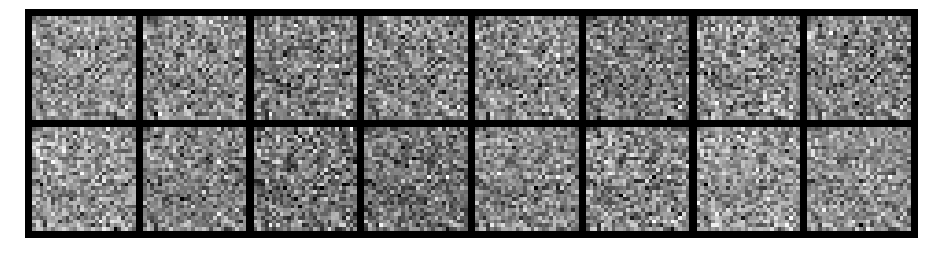

Epoch: [2/200], Batch Num: [0/600]
Discriminator Loss: 1.3723, Generator Loss: 0.7122
D(x): 0.4981, D(G(z)): 0.4908


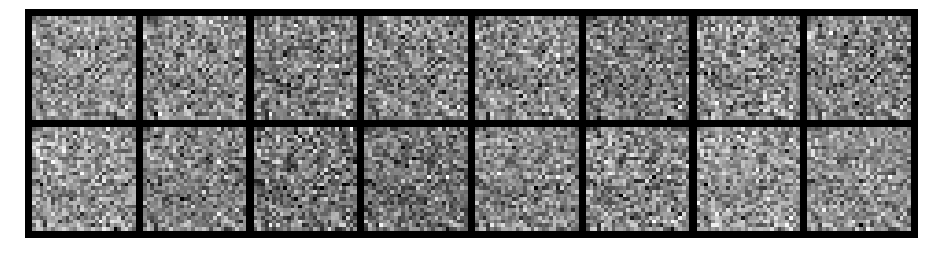

Epoch: [2/200], Batch Num: [100/600]
Discriminator Loss: 1.3672, Generator Loss: 0.7121
D(x): 0.5005, D(G(z)): 0.4906


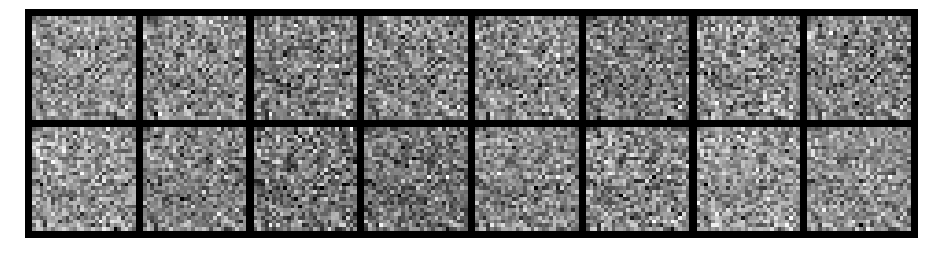

Epoch: [2/200], Batch Num: [200/600]
Discriminator Loss: 1.3736, Generator Loss: 0.7123
D(x): 0.4975, D(G(z)): 0.4909


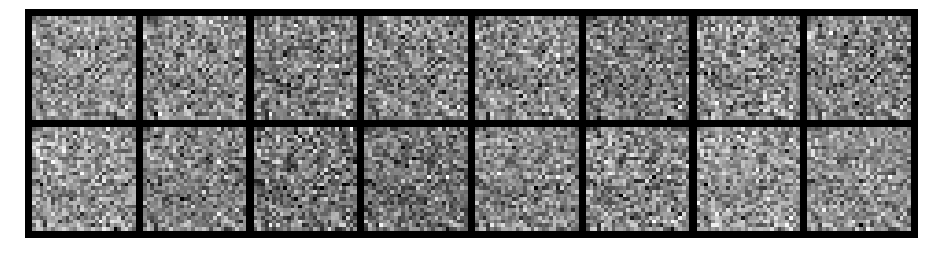

Epoch: [2/200], Batch Num: [300/600]
Discriminator Loss: 1.3639, Generator Loss: 0.7129
D(x): 0.5019, D(G(z)): 0.4904


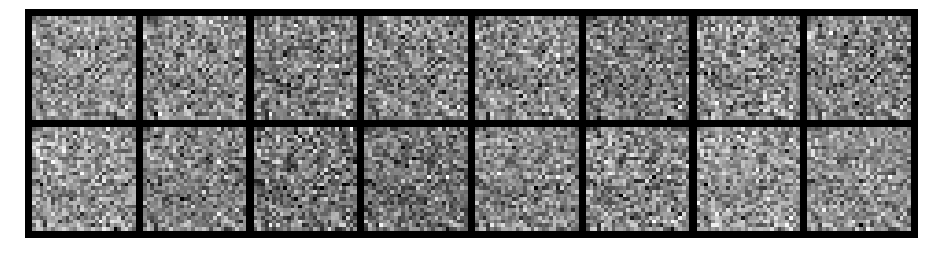

Epoch: [2/200], Batch Num: [400/600]
Discriminator Loss: 1.3710, Generator Loss: 0.7120
D(x): 0.4986, D(G(z)): 0.4906


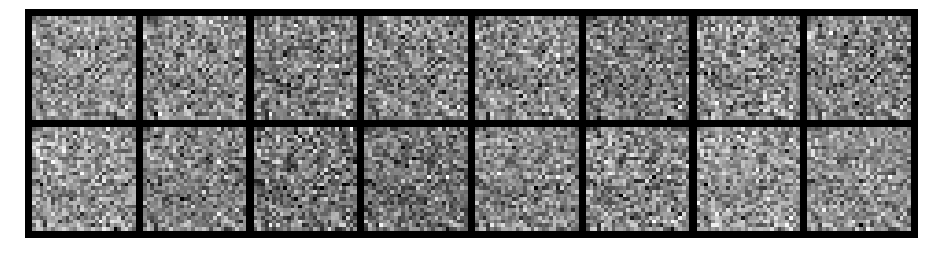

Epoch: [2/200], Batch Num: [500/600]
Discriminator Loss: 1.3741, Generator Loss: 0.7122
D(x): 0.4967, D(G(z)): 0.4904


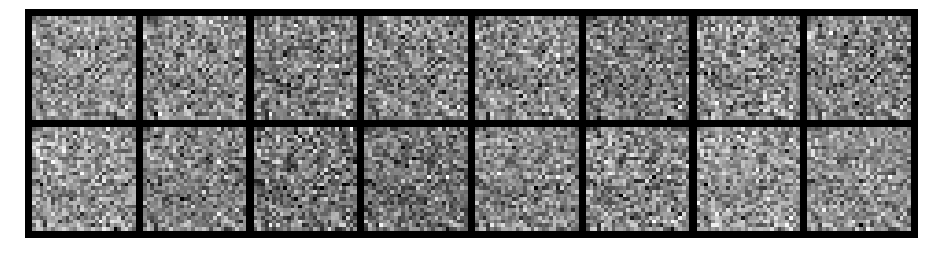

Epoch: [3/200], Batch Num: [0/600]
Discriminator Loss: 1.3659, Generator Loss: 0.7126
D(x): 0.5011, D(G(z)): 0.4906


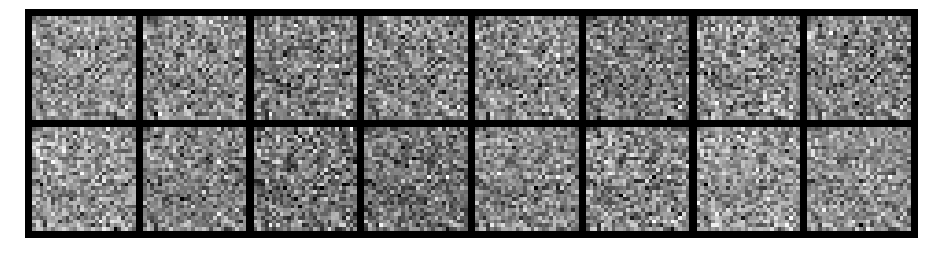

Epoch: [3/200], Batch Num: [100/600]
Discriminator Loss: 1.3653, Generator Loss: 0.7122
D(x): 0.5012, D(G(z)): 0.4904


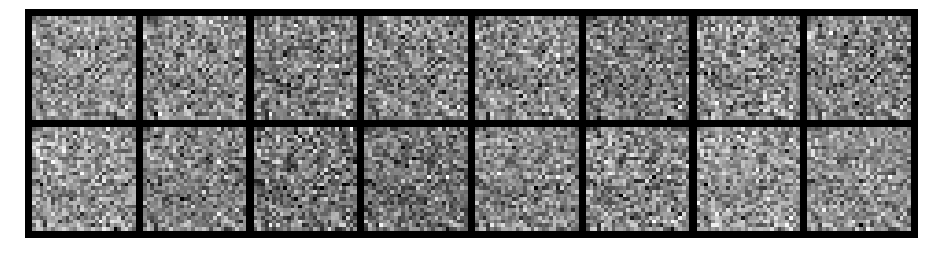

Epoch: [3/200], Batch Num: [200/600]
Discriminator Loss: 1.3677, Generator Loss: 0.7118
D(x): 0.5000, D(G(z)): 0.4904


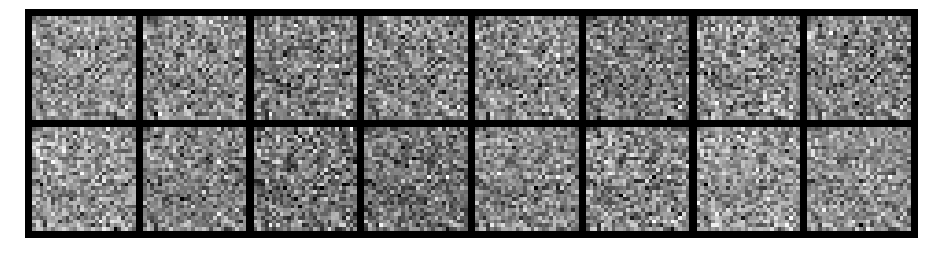

Epoch: [3/200], Batch Num: [300/600]
Discriminator Loss: 1.3727, Generator Loss: 0.7123
D(x): 0.4979, D(G(z)): 0.4908


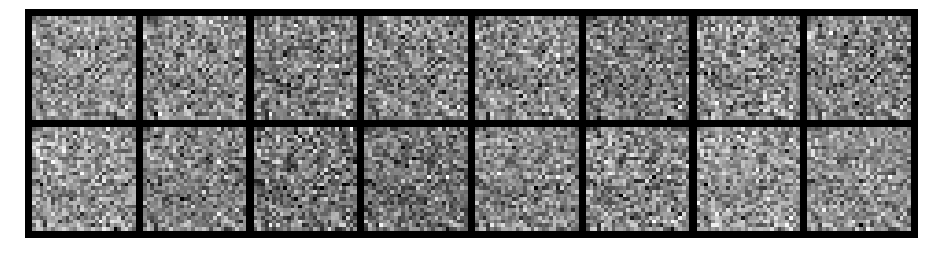

Epoch: [3/200], Batch Num: [400/600]
Discriminator Loss: 1.3681, Generator Loss: 0.7113
D(x): 0.5002, D(G(z)): 0.4908


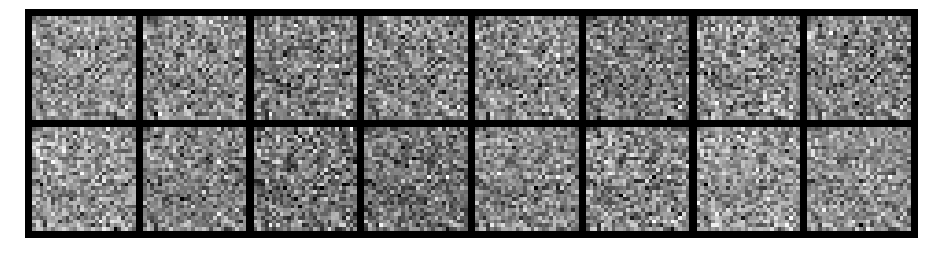

Epoch: [3/200], Batch Num: [500/600]
Discriminator Loss: 1.3690, Generator Loss: 0.7116
D(x): 0.4998, D(G(z)): 0.4909


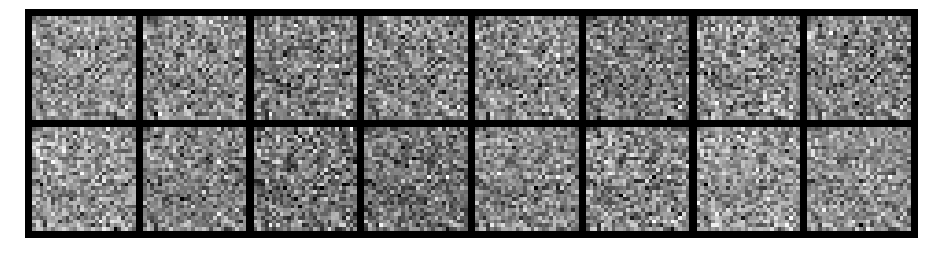

Epoch: [4/200], Batch Num: [0/600]
Discriminator Loss: 1.3666, Generator Loss: 0.7123
D(x): 0.5009, D(G(z)): 0.4908


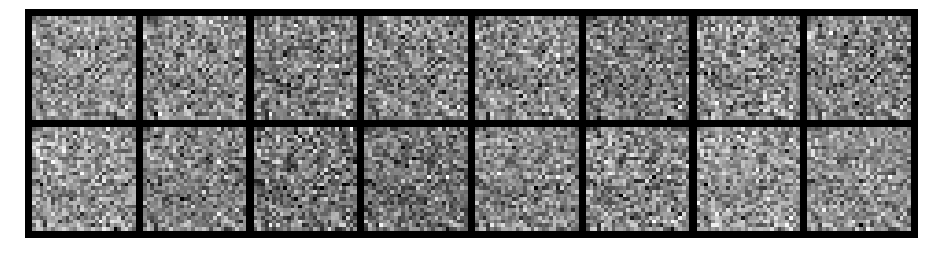

Epoch: [4/200], Batch Num: [100/600]
Discriminator Loss: 1.3666, Generator Loss: 0.7120
D(x): 0.5004, D(G(z)): 0.4903


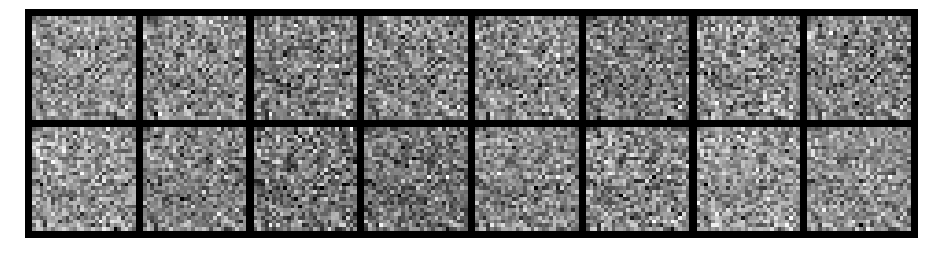

Epoch: [4/200], Batch Num: [200/600]
Discriminator Loss: 1.3716, Generator Loss: 0.7121
D(x): 0.4981, D(G(z)): 0.4903


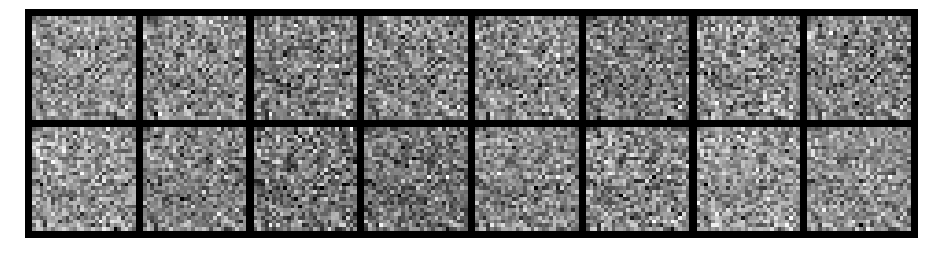

Epoch: [4/200], Batch Num: [300/600]
Discriminator Loss: 1.3719, Generator Loss: 0.7115
D(x): 0.4982, D(G(z)): 0.4907


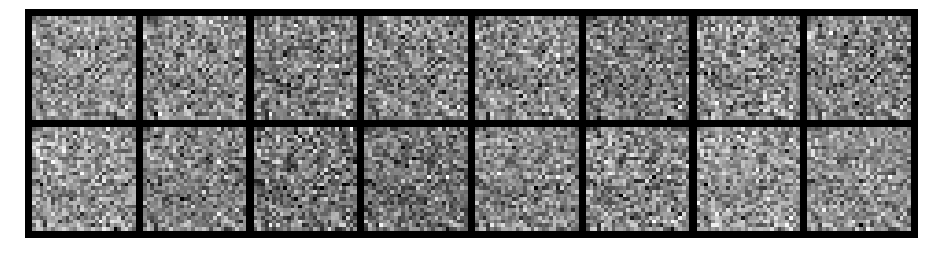

Epoch: [4/200], Batch Num: [400/600]
Discriminator Loss: 1.3717, Generator Loss: 0.7122
D(x): 0.4985, D(G(z)): 0.4909


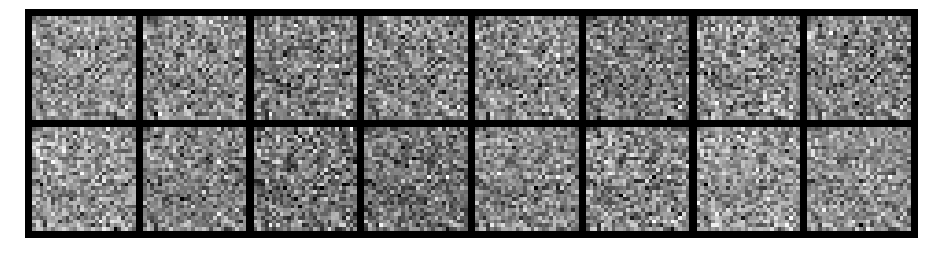

Epoch: [4/200], Batch Num: [500/600]
Discriminator Loss: 1.3684, Generator Loss: 0.7127
D(x): 0.4999, D(G(z)): 0.4907


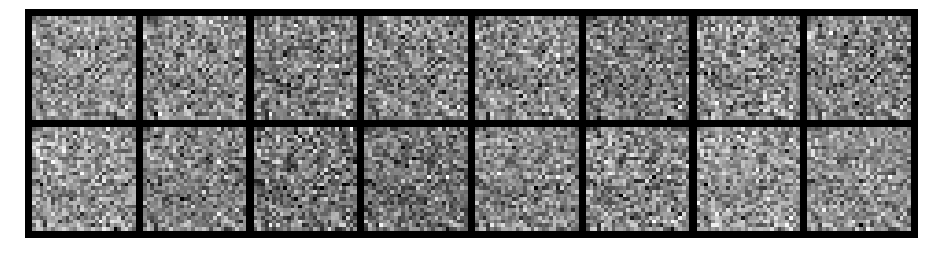

Epoch: [5/200], Batch Num: [0/600]
Discriminator Loss: 1.3729, Generator Loss: 0.7118
D(x): 0.4979, D(G(z)): 0.4909


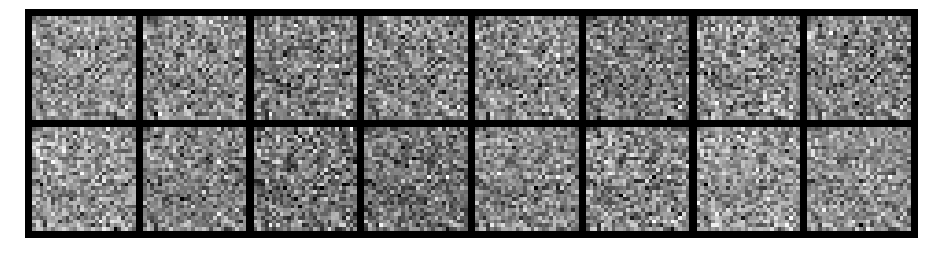

Epoch: [5/200], Batch Num: [100/600]
Discriminator Loss: 1.3662, Generator Loss: 0.7112
D(x): 0.5007, D(G(z)): 0.4903


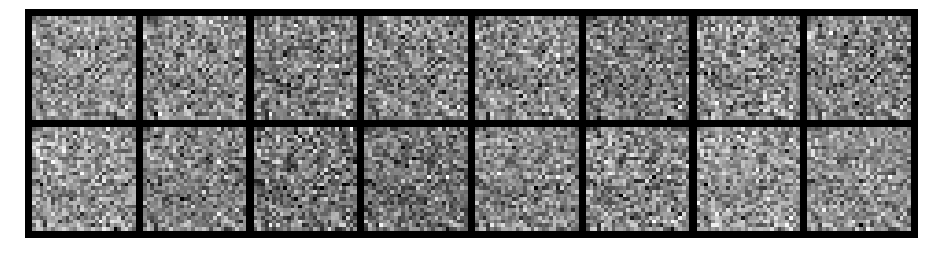

Epoch: [5/200], Batch Num: [200/600]
Discriminator Loss: 1.3709, Generator Loss: 0.7123
D(x): 0.4989, D(G(z)): 0.4909


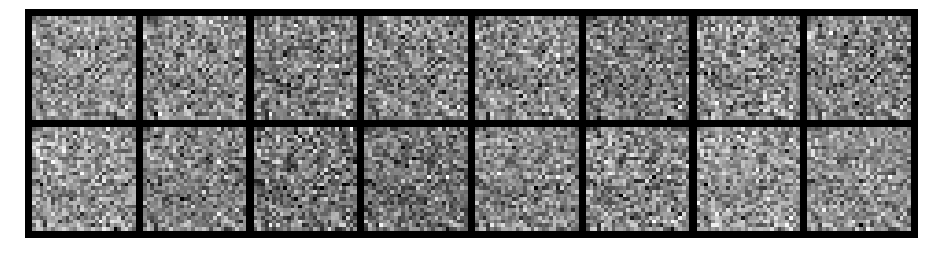

Epoch: [5/200], Batch Num: [300/600]
Discriminator Loss: 1.3682, Generator Loss: 0.7121
D(x): 0.4998, D(G(z)): 0.4904


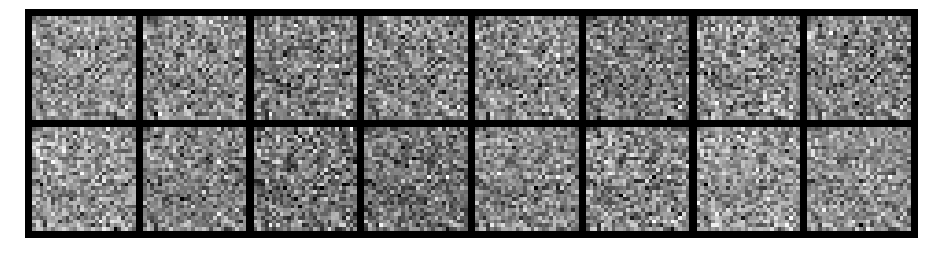

Epoch: [5/200], Batch Num: [400/600]
Discriminator Loss: 1.3737, Generator Loss: 0.7123
D(x): 0.4972, D(G(z)): 0.4906


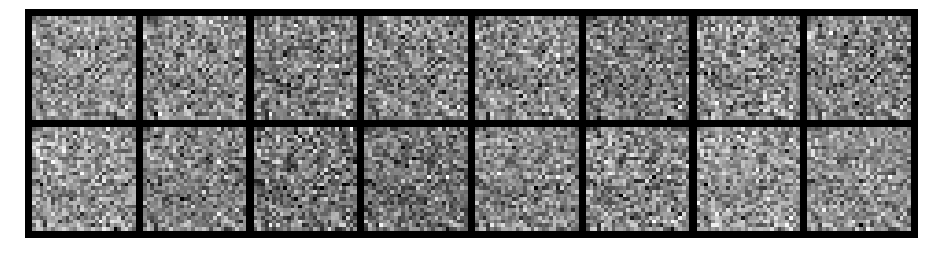

Epoch: [5/200], Batch Num: [500/600]
Discriminator Loss: 1.3701, Generator Loss: 0.7117
D(x): 0.4986, D(G(z)): 0.4902


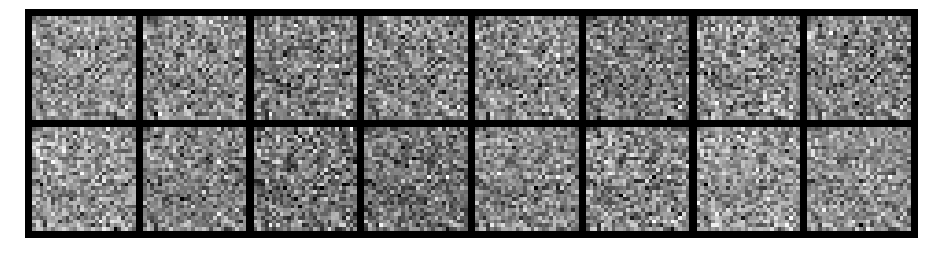

Epoch: [6/200], Batch Num: [0/600]
Discriminator Loss: 1.3673, Generator Loss: 0.7120
D(x): 0.5006, D(G(z)): 0.4908


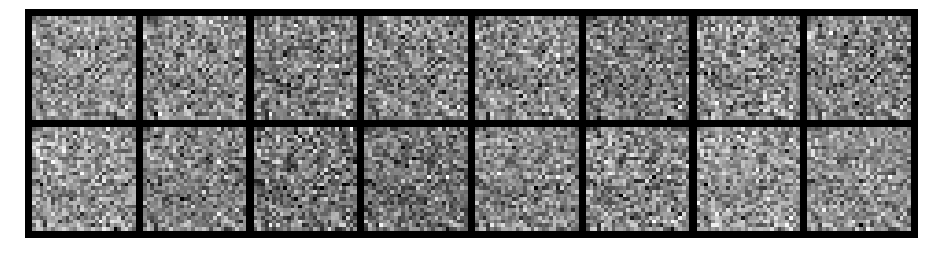

Epoch: [6/200], Batch Num: [100/600]
Discriminator Loss: 1.3783, Generator Loss: 0.7125
D(x): 0.4953, D(G(z)): 0.4911


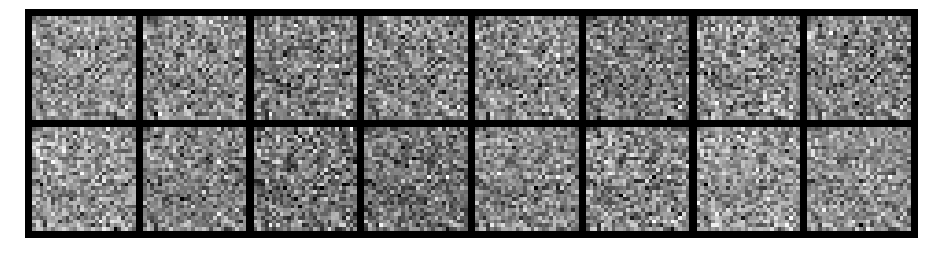

Epoch: [6/200], Batch Num: [200/600]
Discriminator Loss: 1.3718, Generator Loss: 0.7119
D(x): 0.4978, D(G(z)): 0.4903


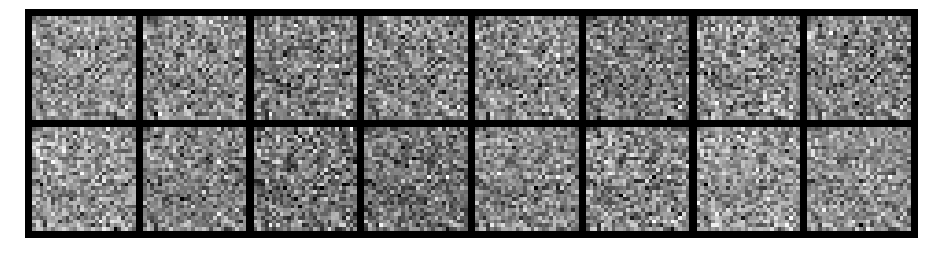

Epoch: [6/200], Batch Num: [300/600]
Discriminator Loss: 1.3683, Generator Loss: 0.7122
D(x): 0.4999, D(G(z)): 0.4907


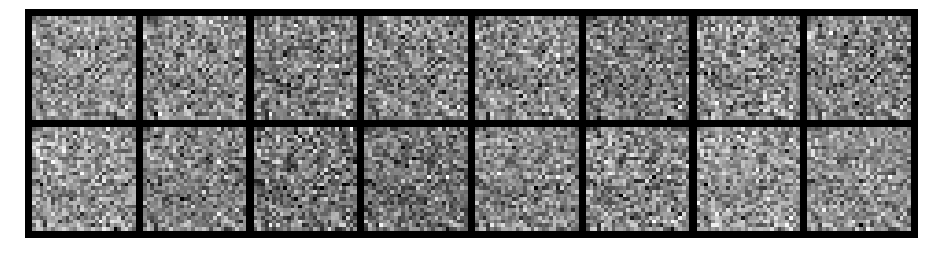

Epoch: [6/200], Batch Num: [400/600]
Discriminator Loss: 1.3628, Generator Loss: 0.7120
D(x): 0.5026, D(G(z)): 0.4905


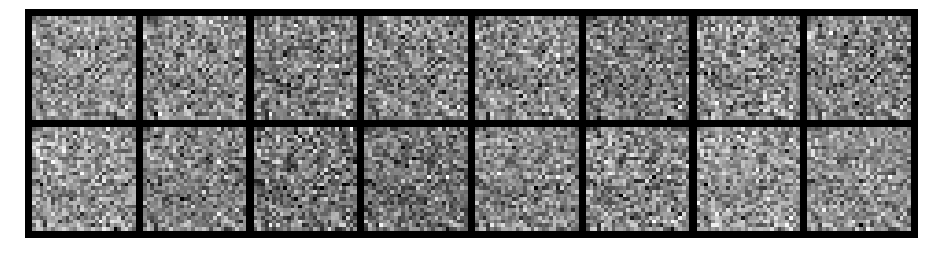

Epoch: [6/200], Batch Num: [500/600]
Discriminator Loss: 1.3708, Generator Loss: 0.7125
D(x): 0.4986, D(G(z)): 0.4905


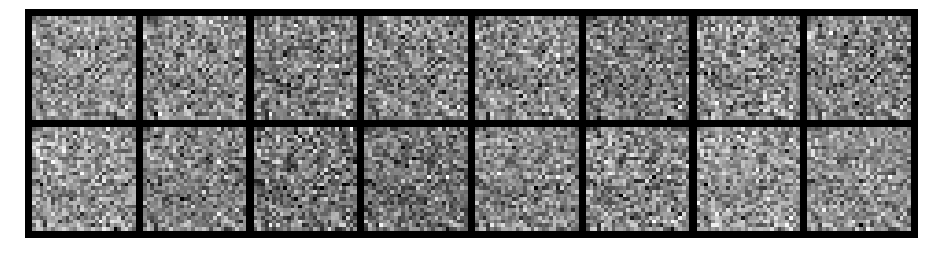

Epoch: [7/200], Batch Num: [0/600]
Discriminator Loss: 1.3686, Generator Loss: 0.7123
D(x): 0.4997, D(G(z)): 0.4906


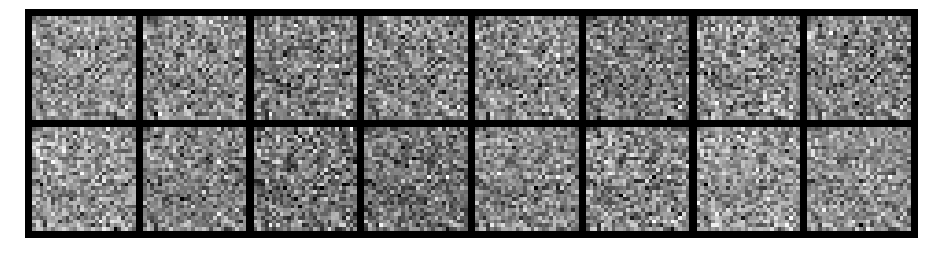

Epoch: [7/200], Batch Num: [100/600]
Discriminator Loss: 1.3683, Generator Loss: 0.7122
D(x): 0.4998, D(G(z)): 0.4905


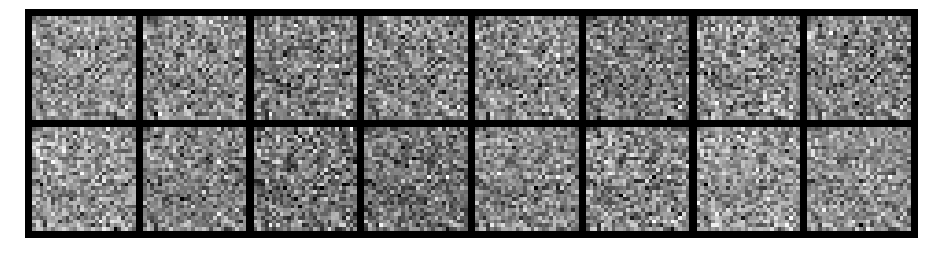

Epoch: [7/200], Batch Num: [200/600]
Discriminator Loss: 1.3684, Generator Loss: 0.7122
D(x): 0.4993, D(G(z)): 0.4900


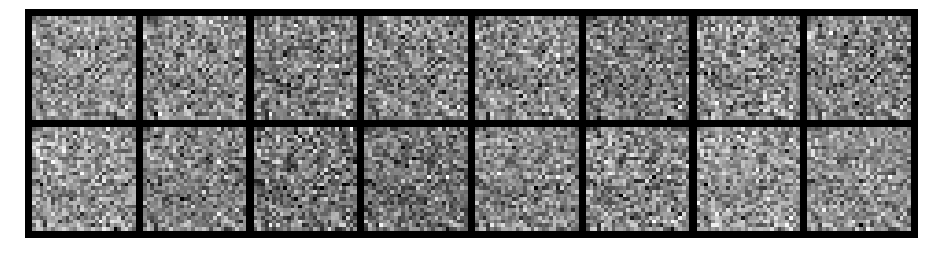

Epoch: [7/200], Batch Num: [300/600]
Discriminator Loss: 1.3708, Generator Loss: 0.7122
D(x): 0.4986, D(G(z)): 0.4906


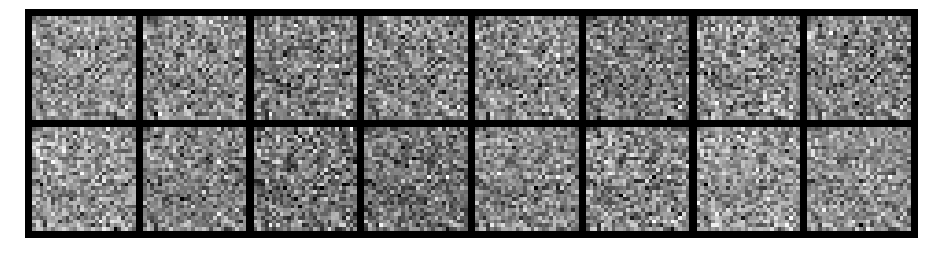

Epoch: [7/200], Batch Num: [400/600]
Discriminator Loss: 1.3764, Generator Loss: 0.7129
D(x): 0.4956, D(G(z)): 0.4904


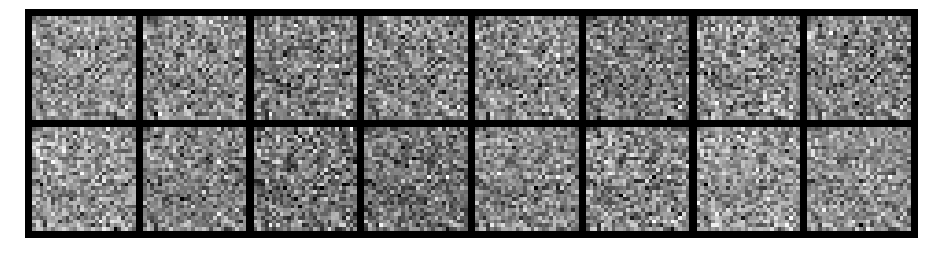

Epoch: [7/200], Batch Num: [500/600]
Discriminator Loss: 1.3674, Generator Loss: 0.7119
D(x): 0.5000, D(G(z)): 0.4903


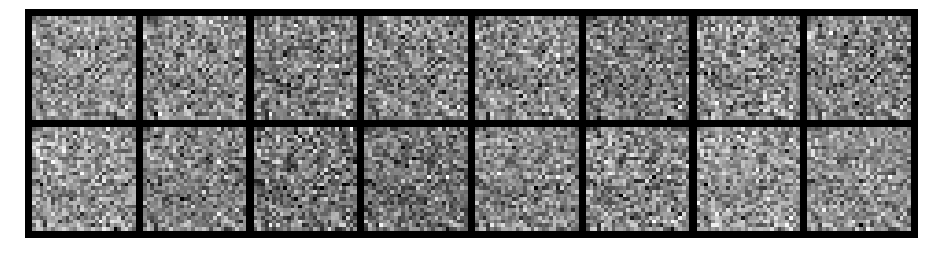

Epoch: [8/200], Batch Num: [0/600]
Discriminator Loss: 1.3732, Generator Loss: 0.7121
D(x): 0.4973, D(G(z)): 0.4904


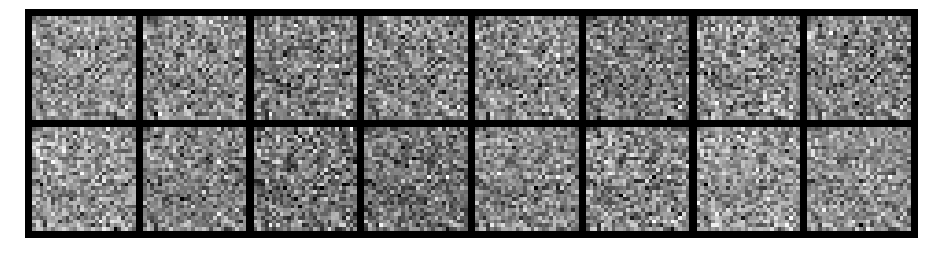

Epoch: [8/200], Batch Num: [100/600]
Discriminator Loss: 1.3734, Generator Loss: 0.7125
D(x): 0.4977, D(G(z)): 0.4910


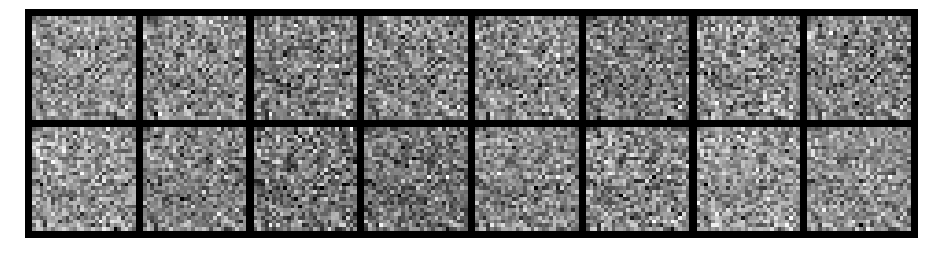

Epoch: [8/200], Batch Num: [200/600]
Discriminator Loss: 1.3712, Generator Loss: 0.7119
D(x): 0.4987, D(G(z)): 0.4908


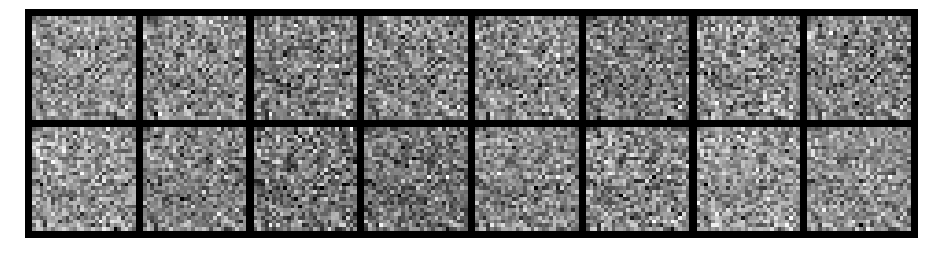

Epoch: [8/200], Batch Num: [300/600]
Discriminator Loss: 1.3713, Generator Loss: 0.7115
D(x): 0.4984, D(G(z)): 0.4906


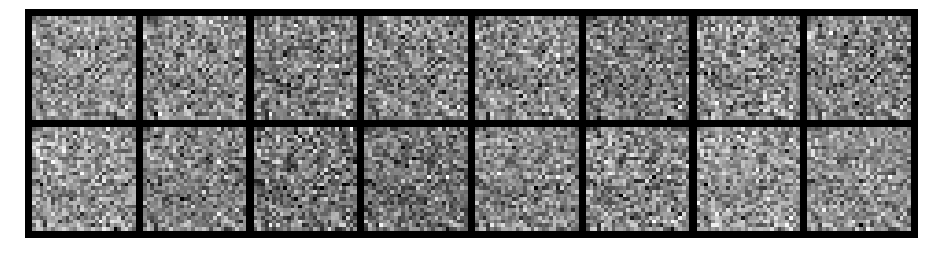

Epoch: [8/200], Batch Num: [400/600]
Discriminator Loss: 1.3672, Generator Loss: 0.7125
D(x): 0.5003, D(G(z)): 0.4905


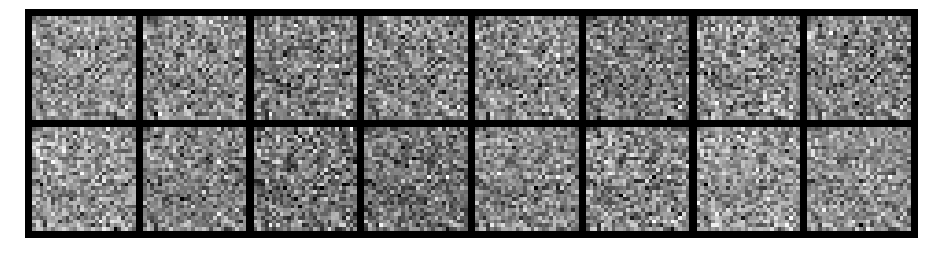

Epoch: [8/200], Batch Num: [500/600]
Discriminator Loss: 1.3694, Generator Loss: 0.7123
D(x): 0.4991, D(G(z)): 0.4904


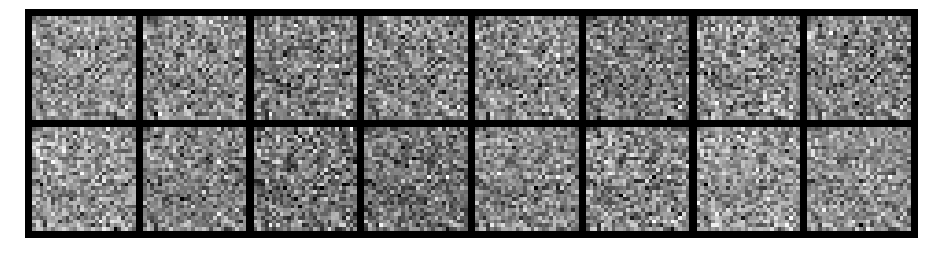

Epoch: [9/200], Batch Num: [0/600]
Discriminator Loss: 1.3711, Generator Loss: 0.7116
D(x): 0.4985, D(G(z)): 0.4905


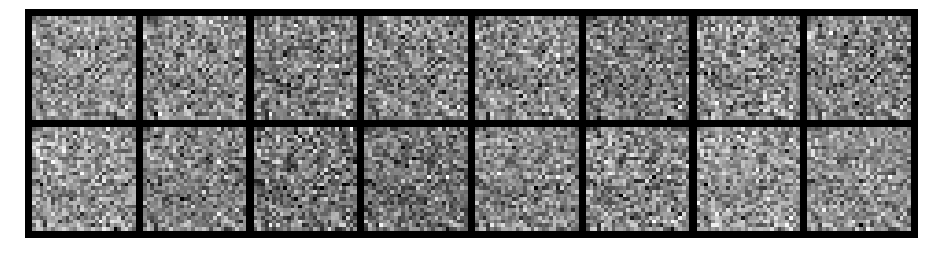

Epoch: [9/200], Batch Num: [100/600]
Discriminator Loss: 1.3690, Generator Loss: 0.7124
D(x): 0.5001, D(G(z)): 0.4912


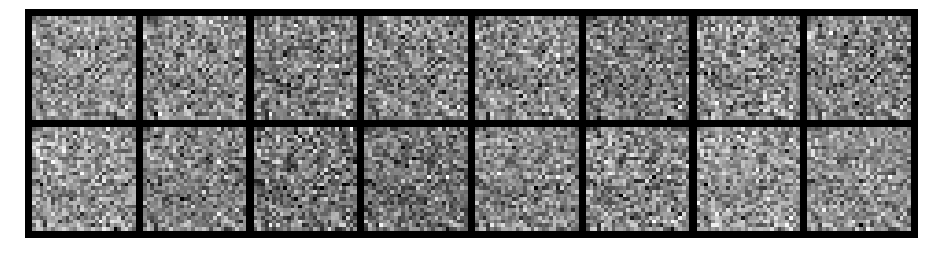

Epoch: [9/200], Batch Num: [200/600]
Discriminator Loss: 1.3667, Generator Loss: 0.7124
D(x): 0.5003, D(G(z)): 0.4902


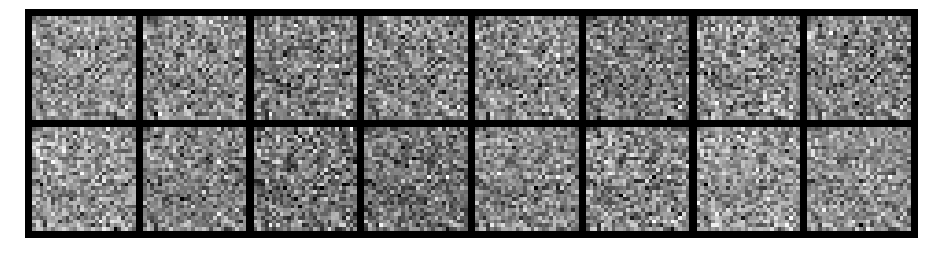

Epoch: [9/200], Batch Num: [300/600]
Discriminator Loss: 1.3638, Generator Loss: 0.7135
D(x): 0.5019, D(G(z)): 0.4903


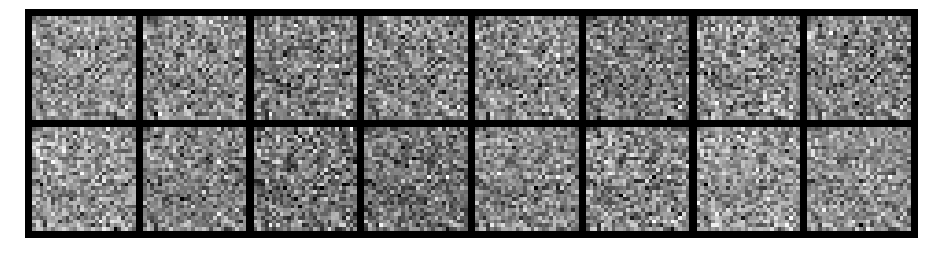

Epoch: [9/200], Batch Num: [400/600]
Discriminator Loss: 1.3650, Generator Loss: 0.7115
D(x): 0.5014, D(G(z)): 0.4905


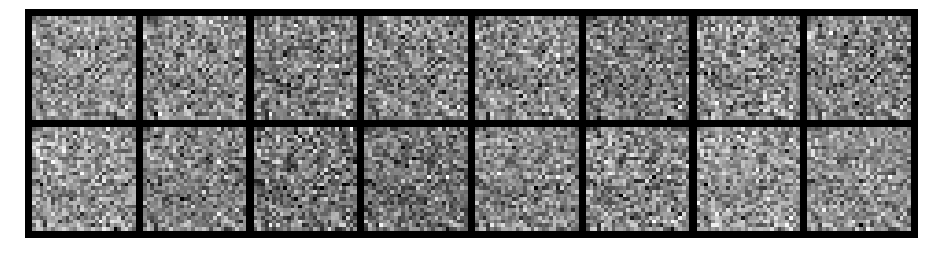

Epoch: [9/200], Batch Num: [500/600]
Discriminator Loss: 1.3726, Generator Loss: 0.7134
D(x): 0.4980, D(G(z)): 0.4908


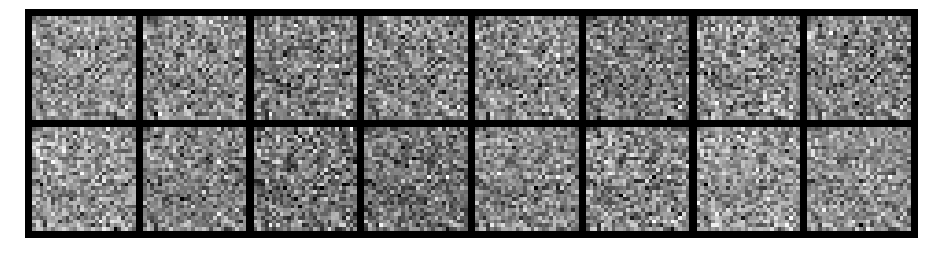

Epoch: [10/200], Batch Num: [0/600]
Discriminator Loss: 1.3703, Generator Loss: 0.7126
D(x): 0.4994, D(G(z)): 0.4910


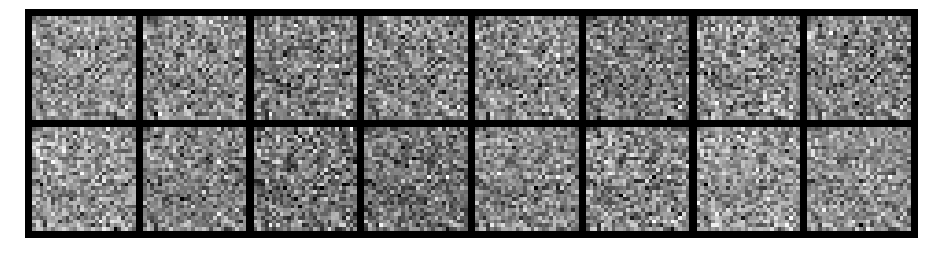

Epoch: [10/200], Batch Num: [100/600]
Discriminator Loss: 1.3663, Generator Loss: 0.7118
D(x): 0.5006, D(G(z)): 0.4903


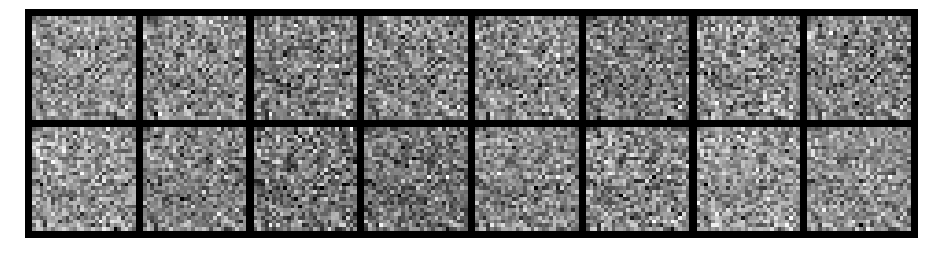

Epoch: [10/200], Batch Num: [200/600]
Discriminator Loss: 1.3706, Generator Loss: 0.7121
D(x): 0.4987, D(G(z)): 0.4905


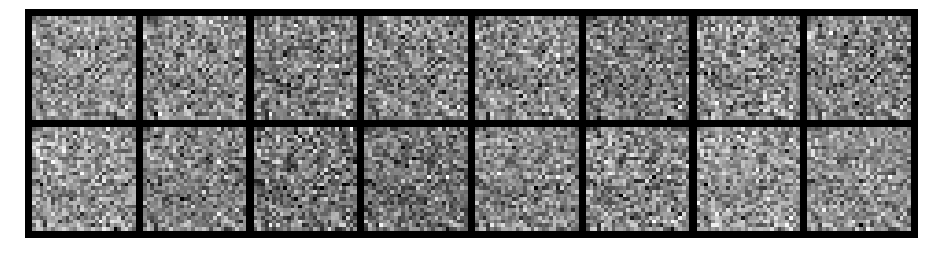

Epoch: [10/200], Batch Num: [300/600]
Discriminator Loss: 1.3737, Generator Loss: 0.7120
D(x): 0.4971, D(G(z)): 0.4905


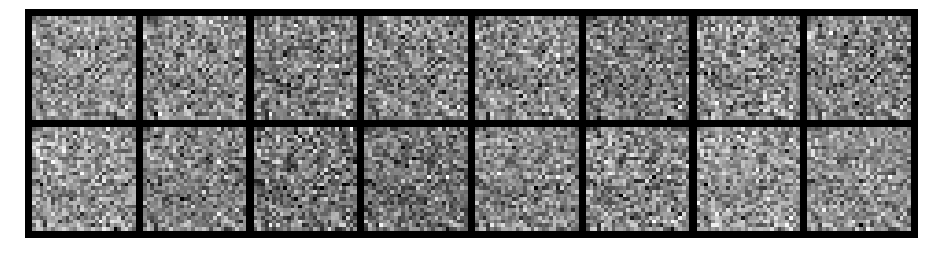

Epoch: [10/200], Batch Num: [400/600]
Discriminator Loss: 1.3726, Generator Loss: 0.7118
D(x): 0.4976, D(G(z)): 0.4904


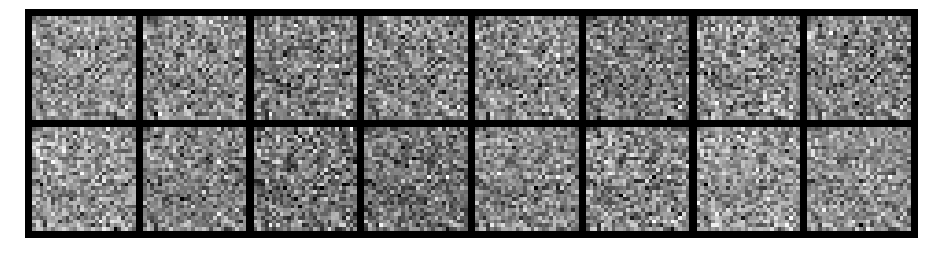

Epoch: [10/200], Batch Num: [500/600]
Discriminator Loss: 1.3687, Generator Loss: 0.7126
D(x): 0.4996, D(G(z)): 0.4905


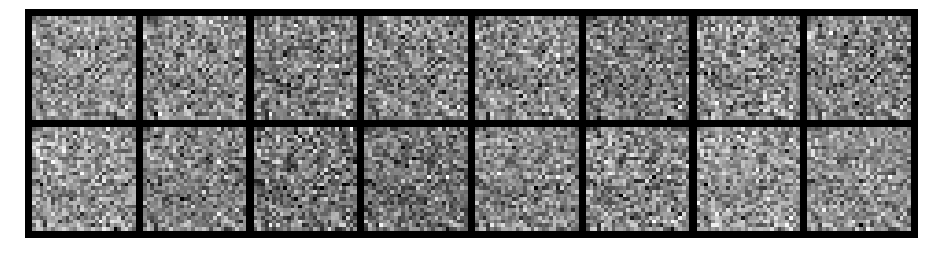

Epoch: [11/200], Batch Num: [0/600]
Discriminator Loss: 1.3713, Generator Loss: 0.7122
D(x): 0.4986, D(G(z)): 0.4908


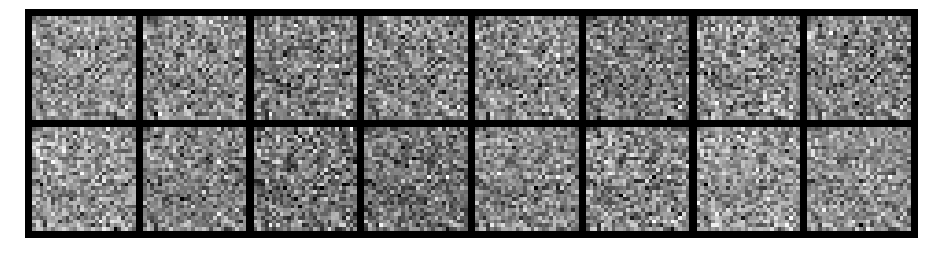

Epoch: [11/200], Batch Num: [100/600]
Discriminator Loss: 1.3729, Generator Loss: 0.7115
D(x): 0.4973, D(G(z)): 0.4903


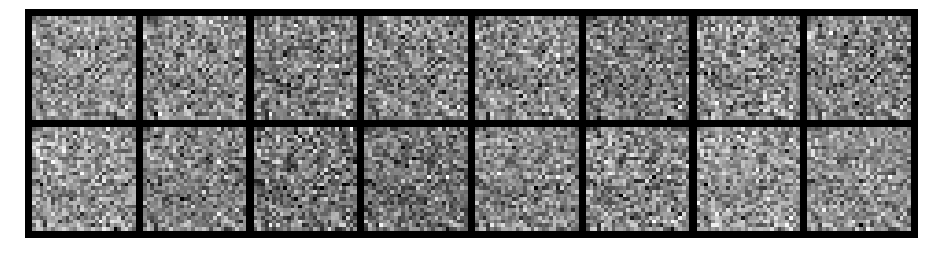

Epoch: [11/200], Batch Num: [200/600]
Discriminator Loss: 1.3689, Generator Loss: 0.7118
D(x): 0.4995, D(G(z)): 0.4905


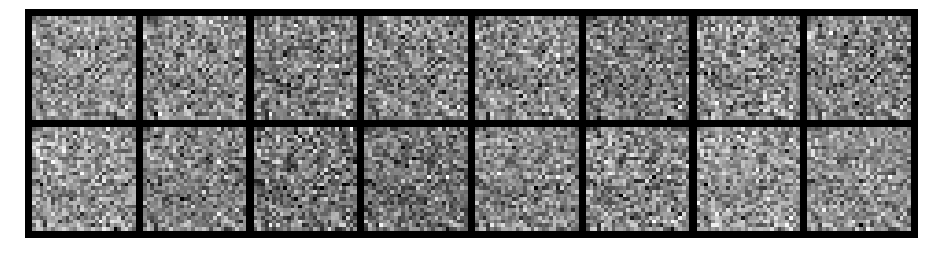

Epoch: [11/200], Batch Num: [300/600]
Discriminator Loss: 1.3674, Generator Loss: 0.7122
D(x): 0.5002, D(G(z)): 0.4904


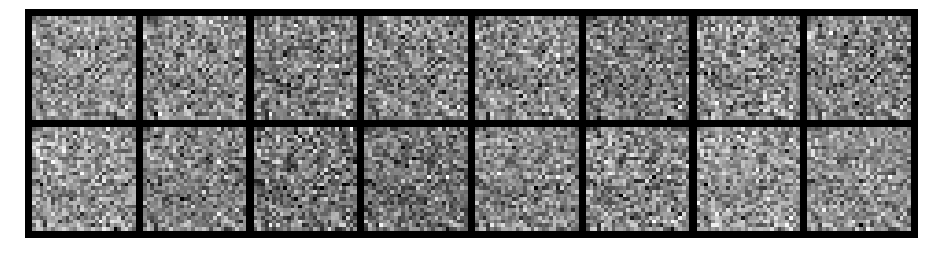

Epoch: [11/200], Batch Num: [400/600]
Discriminator Loss: 1.3655, Generator Loss: 0.7126
D(x): 0.5015, D(G(z)): 0.4908


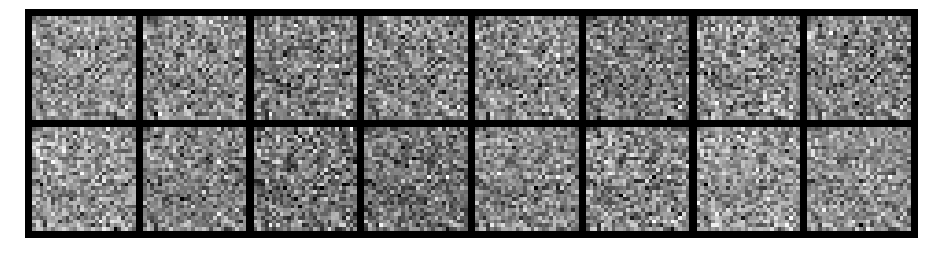

Epoch: [11/200], Batch Num: [500/600]
Discriminator Loss: 1.3678, Generator Loss: 0.7120
D(x): 0.5002, D(G(z)): 0.4907


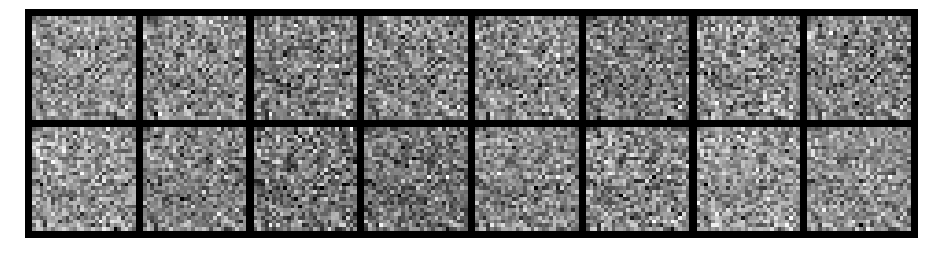

Epoch: [12/200], Batch Num: [0/600]
Discriminator Loss: 1.3681, Generator Loss: 0.7129
D(x): 0.4998, D(G(z)): 0.4905


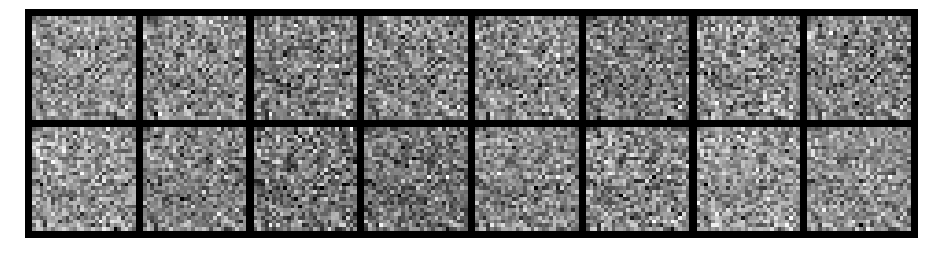

Epoch: [12/200], Batch Num: [100/600]
Discriminator Loss: 1.3681, Generator Loss: 0.7121
D(x): 0.4999, D(G(z)): 0.4905


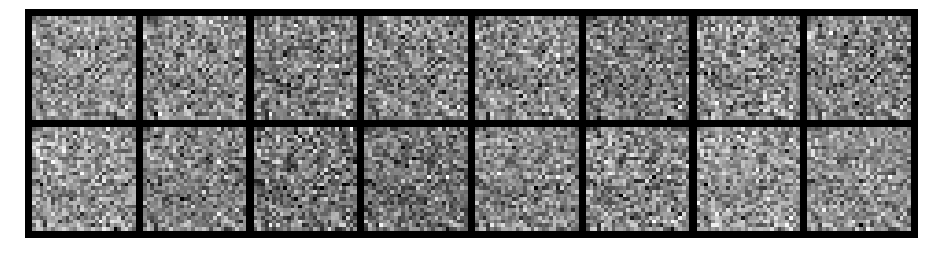

Epoch: [12/200], Batch Num: [200/600]
Discriminator Loss: 1.3763, Generator Loss: 0.7121
D(x): 0.4958, D(G(z)): 0.4905


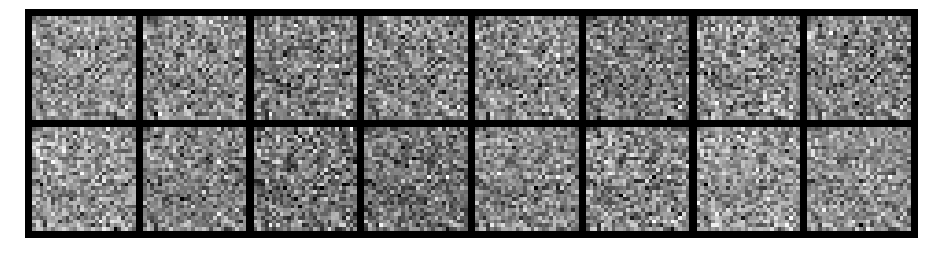

Epoch: [12/200], Batch Num: [300/600]
Discriminator Loss: 1.3712, Generator Loss: 0.7120
D(x): 0.4984, D(G(z)): 0.4906


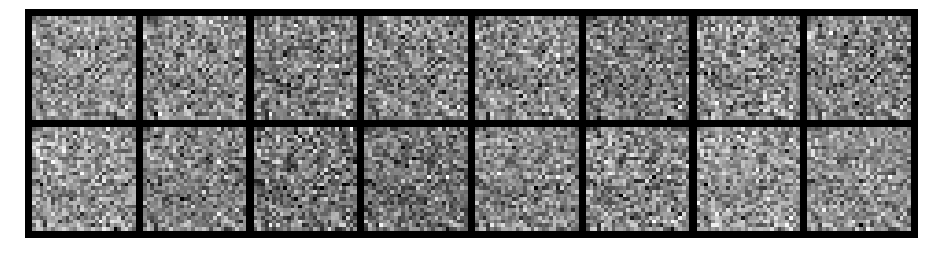

Epoch: [12/200], Batch Num: [400/600]
Discriminator Loss: 1.3671, Generator Loss: 0.7123
D(x): 0.5005, D(G(z)): 0.4906


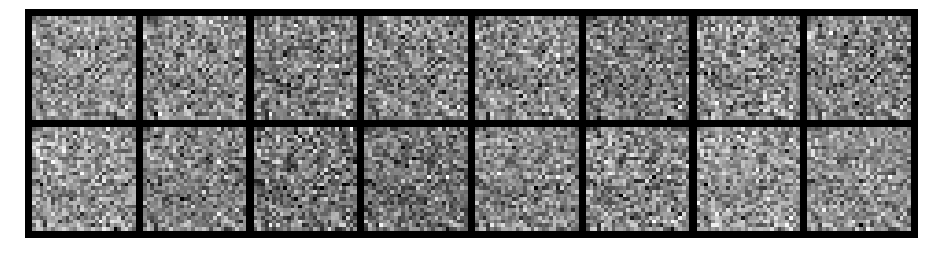

Epoch: [12/200], Batch Num: [500/600]
Discriminator Loss: 1.3705, Generator Loss: 0.7117
D(x): 0.4983, D(G(z)): 0.4902


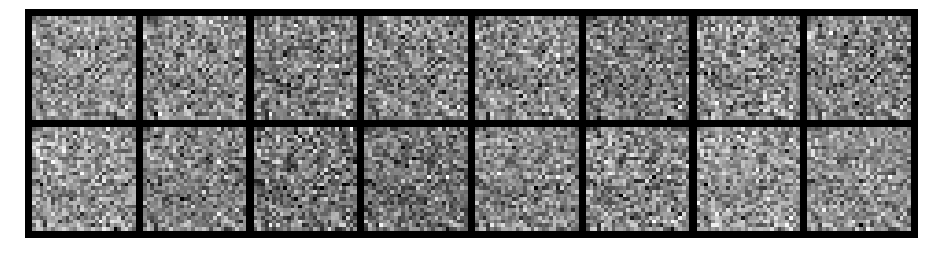

Epoch: [13/200], Batch Num: [0/600]
Discriminator Loss: 1.3726, Generator Loss: 0.7116
D(x): 0.4980, D(G(z)): 0.4908


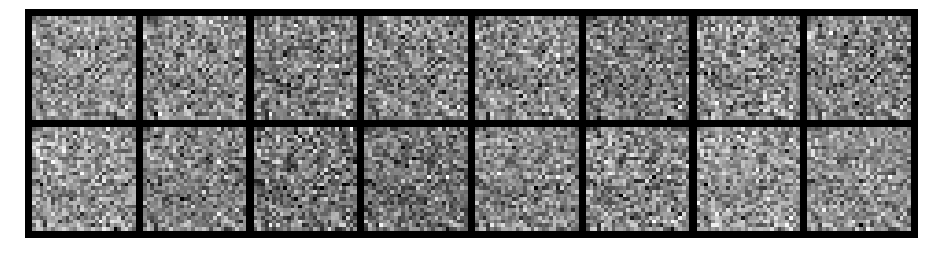

Epoch: [13/200], Batch Num: [100/600]
Discriminator Loss: 1.3684, Generator Loss: 0.7124
D(x): 0.5000, D(G(z)): 0.4907


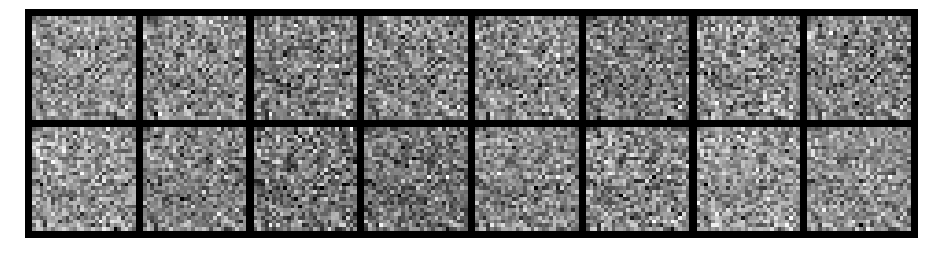

Epoch: [13/200], Batch Num: [200/600]
Discriminator Loss: 1.3720, Generator Loss: 0.7126
D(x): 0.4986, D(G(z)): 0.4911


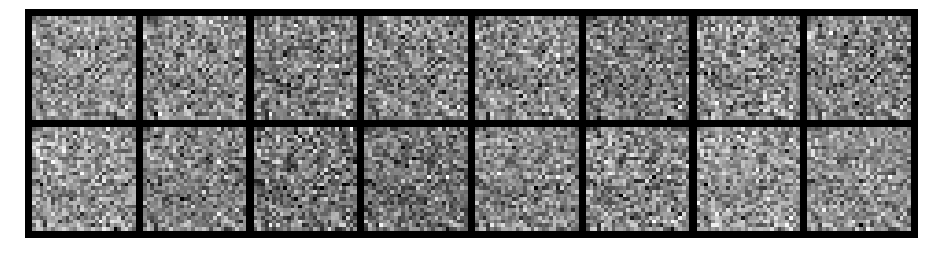

Epoch: [13/200], Batch Num: [300/600]
Discriminator Loss: 1.3709, Generator Loss: 0.7127
D(x): 0.4987, D(G(z)): 0.4907


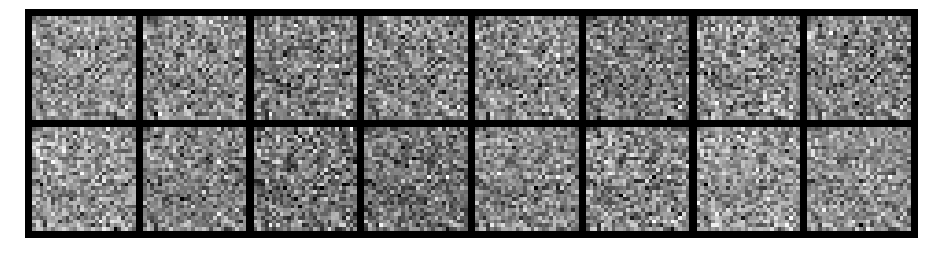

Epoch: [13/200], Batch Num: [400/600]
Discriminator Loss: 1.3730, Generator Loss: 0.7127
D(x): 0.4977, D(G(z)): 0.4908


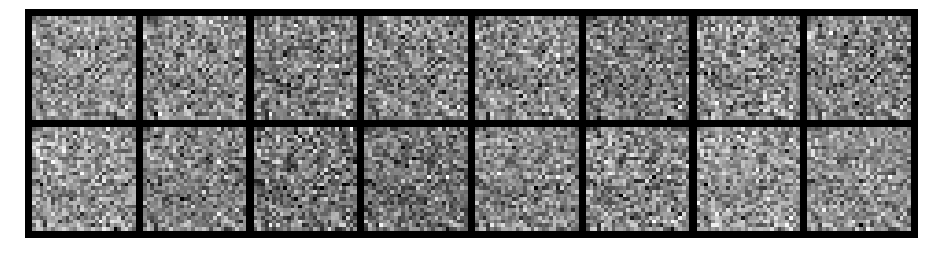

Epoch: [13/200], Batch Num: [500/600]
Discriminator Loss: 1.3716, Generator Loss: 0.7120
D(x): 0.4982, D(G(z)): 0.4905


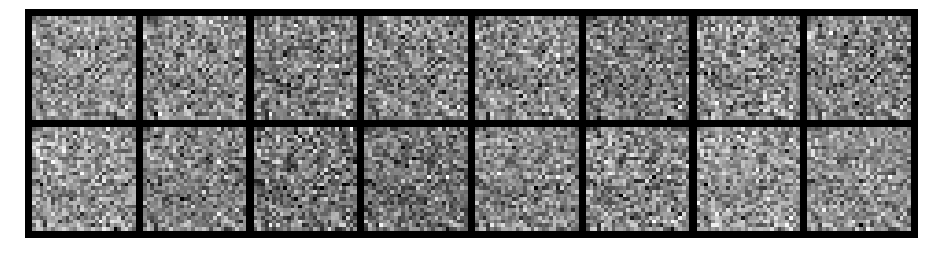

Epoch: [14/200], Batch Num: [0/600]
Discriminator Loss: 1.3692, Generator Loss: 0.7128
D(x): 0.4995, D(G(z)): 0.4907


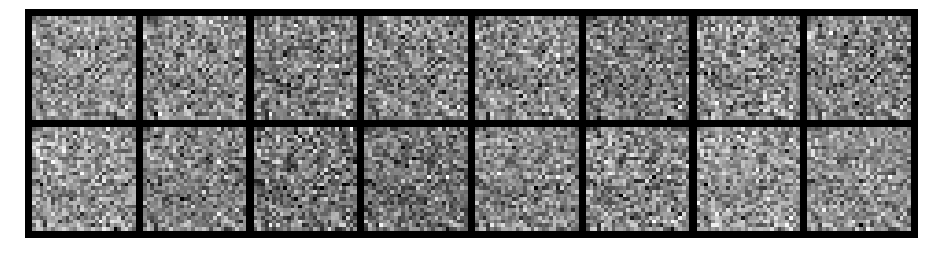

Epoch: [14/200], Batch Num: [100/600]
Discriminator Loss: 1.3703, Generator Loss: 0.7118
D(x): 0.4987, D(G(z)): 0.4904


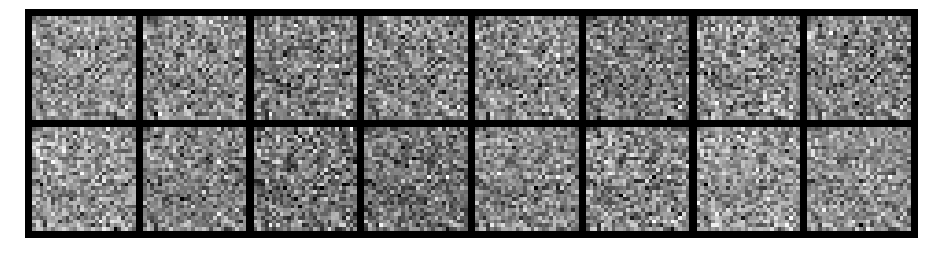

Epoch: [14/200], Batch Num: [200/600]
Discriminator Loss: 1.3665, Generator Loss: 0.7121
D(x): 0.5010, D(G(z)): 0.4908


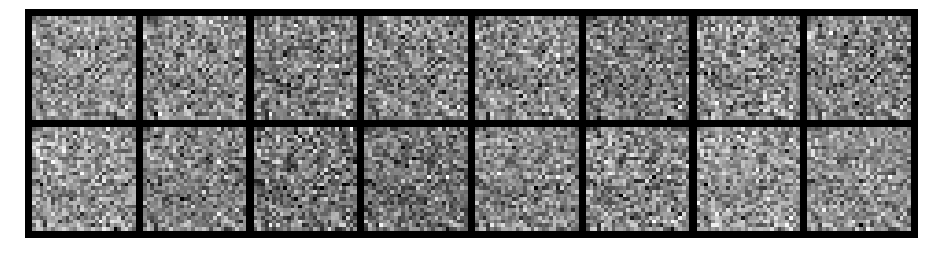

Epoch: [14/200], Batch Num: [300/600]
Discriminator Loss: 1.3691, Generator Loss: 0.7120
D(x): 0.4994, D(G(z)): 0.4905


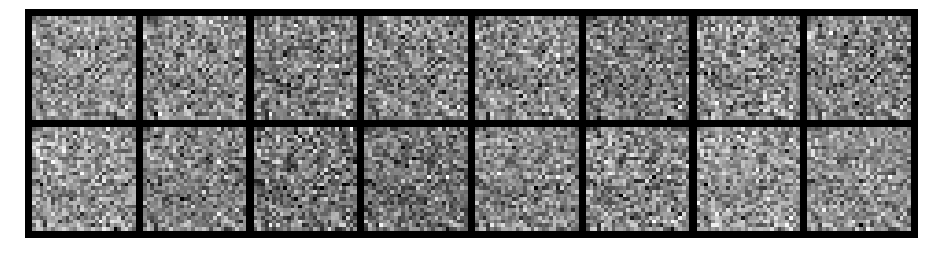

Epoch: [14/200], Batch Num: [400/600]
Discriminator Loss: 1.3722, Generator Loss: 0.7114
D(x): 0.4979, D(G(z)): 0.4905


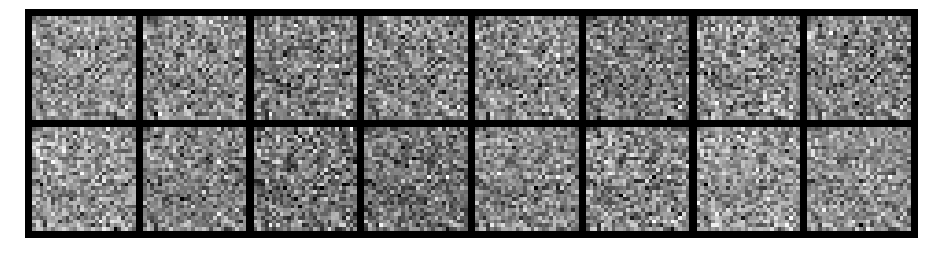

Epoch: [14/200], Batch Num: [500/600]
Discriminator Loss: 1.3684, Generator Loss: 0.7124
D(x): 0.4997, D(G(z)): 0.4905


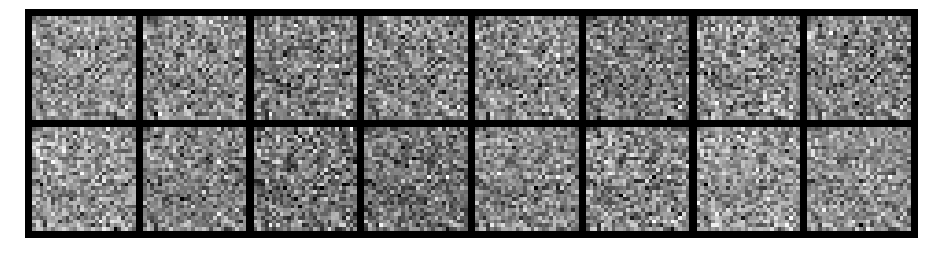

Epoch: [15/200], Batch Num: [0/600]
Discriminator Loss: 1.3686, Generator Loss: 0.7116
D(x): 0.4996, D(G(z)): 0.4905


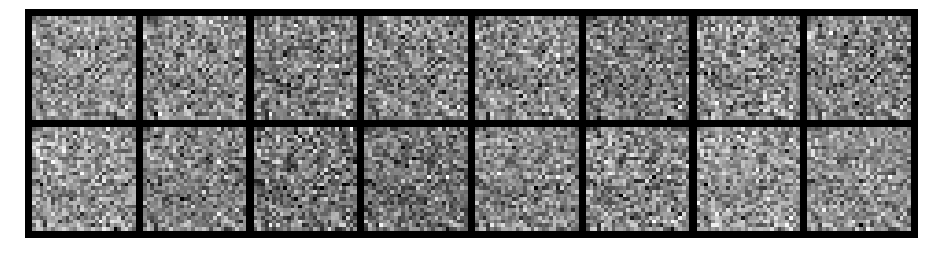

Epoch: [15/200], Batch Num: [100/600]
Discriminator Loss: 1.3653, Generator Loss: 0.7124
D(x): 0.5014, D(G(z)): 0.4906


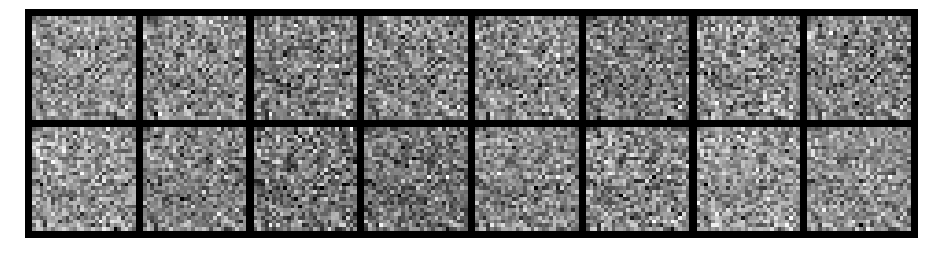

Epoch: [15/200], Batch Num: [200/600]
Discriminator Loss: 1.3668, Generator Loss: 0.7120
D(x): 0.5006, D(G(z)): 0.4906


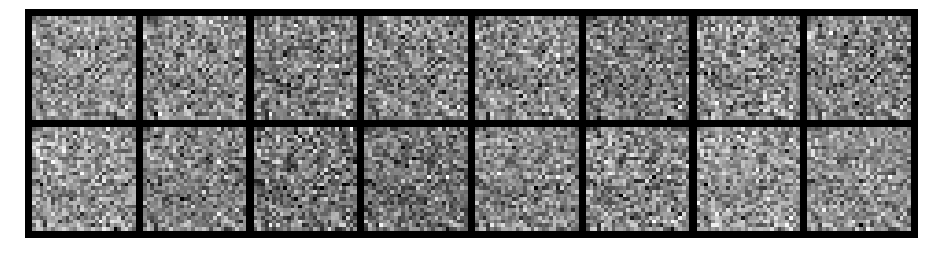

Epoch: [15/200], Batch Num: [300/600]
Discriminator Loss: 1.3702, Generator Loss: 0.7123
D(x): 0.4991, D(G(z)): 0.4908


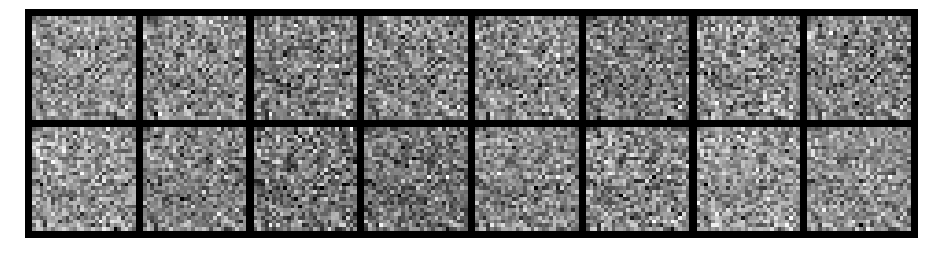

Epoch: [15/200], Batch Num: [400/600]
Discriminator Loss: 1.3689, Generator Loss: 0.7128
D(x): 0.5000, D(G(z)): 0.4911


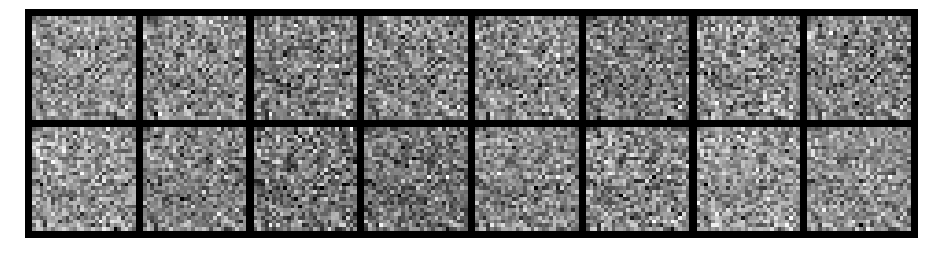

Epoch: [15/200], Batch Num: [500/600]
Discriminator Loss: 1.3668, Generator Loss: 0.7124
D(x): 0.5004, D(G(z)): 0.4904


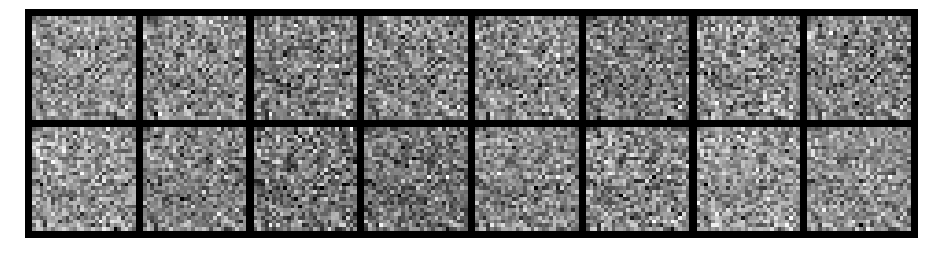

Epoch: [16/200], Batch Num: [0/600]
Discriminator Loss: 1.3704, Generator Loss: 0.7121
D(x): 0.4987, D(G(z)): 0.4905


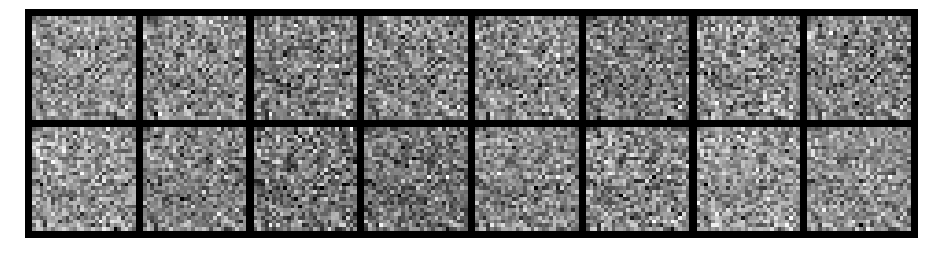

Epoch: [16/200], Batch Num: [100/600]
Discriminator Loss: 1.3774, Generator Loss: 0.7121
D(x): 0.4954, D(G(z)): 0.4906


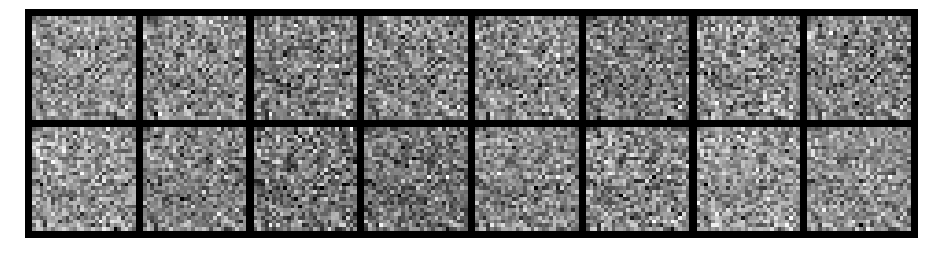

Epoch: [16/200], Batch Num: [200/600]
Discriminator Loss: 1.3654, Generator Loss: 0.7121
D(x): 0.5013, D(G(z)): 0.4905


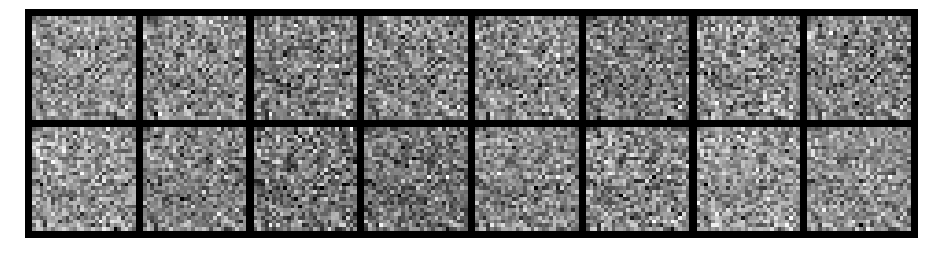

Epoch: [16/200], Batch Num: [300/600]
Discriminator Loss: 1.3721, Generator Loss: 0.7111
D(x): 0.4981, D(G(z)): 0.4907


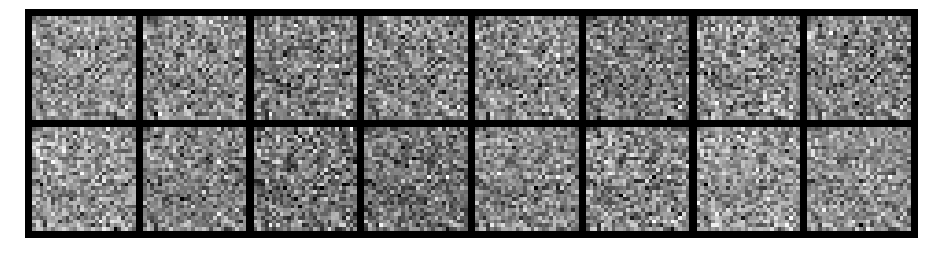

Epoch: [16/200], Batch Num: [400/600]
Discriminator Loss: 1.3734, Generator Loss: 0.7128
D(x): 0.4973, D(G(z)): 0.4906


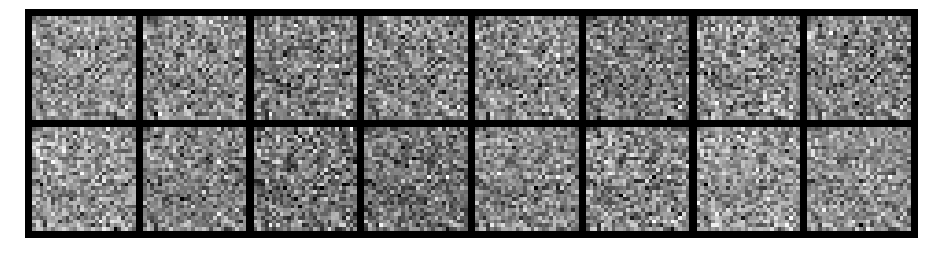

Epoch: [16/200], Batch Num: [500/600]
Discriminator Loss: 1.3758, Generator Loss: 0.7125
D(x): 0.4960, D(G(z)): 0.4904


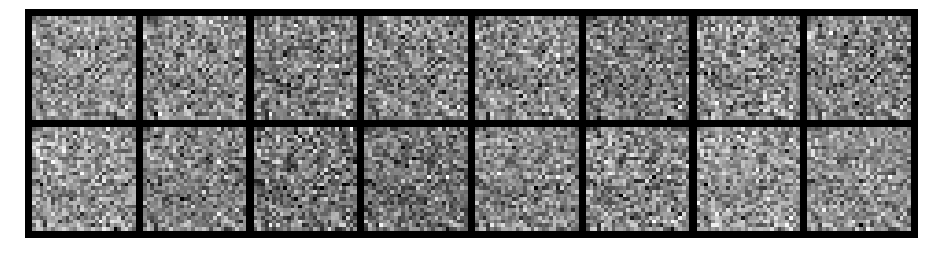

Epoch: [17/200], Batch Num: [0/600]
Discriminator Loss: 1.3715, Generator Loss: 0.7114
D(x): 0.4984, D(G(z)): 0.4907


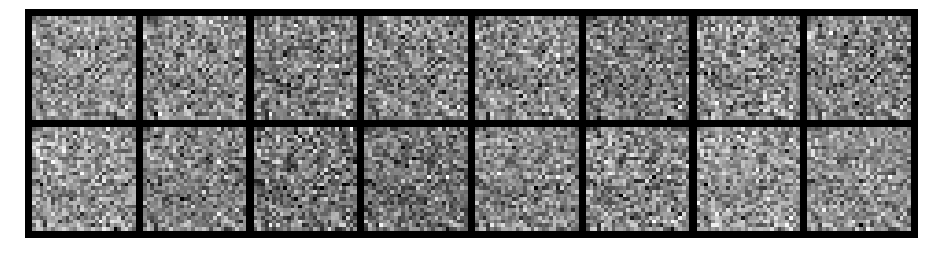

Epoch: [17/200], Batch Num: [100/600]
Discriminator Loss: 1.3703, Generator Loss: 0.7124
D(x): 0.4986, D(G(z)): 0.4903


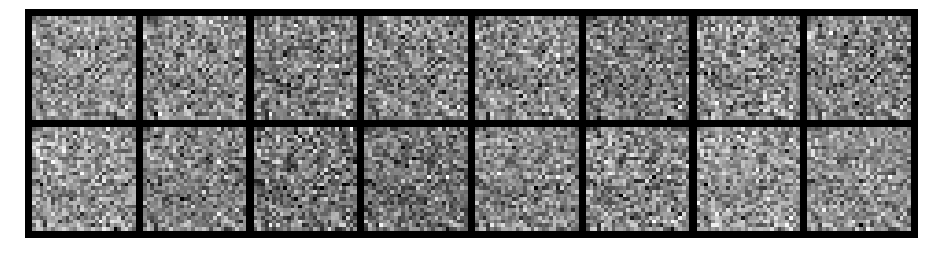

Epoch: [17/200], Batch Num: [200/600]
Discriminator Loss: 1.3722, Generator Loss: 0.7120
D(x): 0.4979, D(G(z)): 0.4906


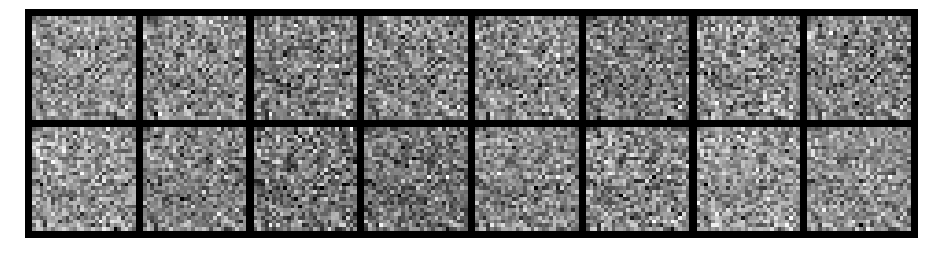

Epoch: [17/200], Batch Num: [300/600]
Discriminator Loss: 1.3699, Generator Loss: 0.7118
D(x): 0.4991, D(G(z)): 0.4906


In [0]:
# from logging import Logger
logger = Logger1(model_name='VGAN', data_name='MNIST')
num_epochs = 200

for epoch in range(num_epochs):
  for n_batch, (real_batch,_) in enumerate(data_loader):
    N=real_batch.size(0)
    
    real_data = Variable(images_to_vectors(real_batch))
    fake_data = generator(noise(N)).detach()
    
    
    d_error,d_pred_real,d_pred_fake = train_discriminator(d_optimizer,real_data,fake_data)
    
    fake_data = generator(noise(N))
    g_error = train_generator(g_optimizer,fake_data)
    
    logger.log(d_error,g_error,epoch,n_batch,0)
    
    if (n_batch) % 100 == 0: 
          test_images = vectors_to_images(generator(test_noise))
          test_images = test_images.data

          logger.log_images(
              test_images, num_test_samples, 
              epoch, n_batch, num_batches
          );
          # Display status Logs
          logger.display_status(
              epoch, num_epochs, n_batch, num_batches,
              d_error, g_error, d_pred_real, d_pred_fake
          )


In [0]:
import os
import numpy as np
import errno
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
from IPython import display
from matplotlib import pyplot as plt
import torch

'''
    TensorBoard Data will be stored in './runs' path
'''


class Logger1:

    def __init__(self, model_name, data_name):
        self.model_name = model_name
        self.data_name = data_name

        self.comment = '{}_{}'.format(model_name, data_name)
        self.data_subdir = '{}/{}'.format(model_name, data_name)

        # TensorBoard
        self.writer = SummaryWriter(comment=self.comment)

    def log(self, d_error, g_error, epoch, n_batch, num_batches):

        # var_class = torch.autograd.variable.Variable
        if isinstance(d_error, torch.autograd.Variable):
            d_error = d_error.data.cpu().numpy()
        if isinstance(g_error, torch.autograd.Variable):
            g_error = g_error.data.cpu().numpy()

        step = Logger1._step(epoch, n_batch, num_batches)
        self.writer.add_scalar(
            '{}/D_error'.format(self.comment), d_error, step)
        self.writer.add_scalar(
            '{}/G_error'.format(self.comment), g_error, step)

    def log_images(self, images, num_images, epoch, n_batch, num_batches, format='NCHW', normalize=True):
        '''
        input images are expected in format (NCHW)
        '''
        if type(images) == np.ndarray:
            images = torch.from_numpy(images)
        
        if format=='NHWC':
            images = images.transpose(1,3)
        

        step = Logger1._step(epoch, n_batch, num_batches)
        img_name = '{}/images{}'.format(self.comment, '')

        # Make horizontal grid from image tensor
        horizontal_grid = vutils.make_grid(
            images, normalize=normalize, scale_each=True)
        # Make vertical grid from image tensor
        nrows = int(np.sqrt(num_images))
        grid = vutils.make_grid(
            images, nrow=nrows, normalize=True, scale_each=True)

        # Add horizontal images to tensorboard
        self.writer.add_image(img_name, horizontal_grid, step)

        # Save plots
        self.save_torch_images(horizontal_grid, grid, epoch, n_batch)

    def save_torch_images(self, horizontal_grid, grid, epoch, n_batch, plot_horizontal=True):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger1._make_dir(out_dir)

        # Plot and save horizontal
        fig = plt.figure(figsize=(16, 16))
        plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
        plt.axis('off')
        if plot_horizontal:
            display.display(plt.gcf())
        self._save_images(fig, epoch, n_batch, 'hori')
        plt.close()

        # Save squared
        fig = plt.figure()
        plt.imshow(np.moveaxis(grid.numpy(), 0, -1))
        plt.axis('off')
        self._save_images(fig, epoch, n_batch)
        plt.close()

    def _save_images(self, fig, epoch, n_batch, comment=''):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger1._make_dir(out_dir)
        fig.savefig('{}/{}_epoch_{}_batch_{}.png'.format(out_dir,
                                                         comment, epoch, n_batch))

    def display_status(self, epoch, num_epochs, n_batch, num_batches, d_error, g_error, d_pred_real, d_pred_fake):
        
        # var_class = torch.autograd.variable.Variable
        if isinstance(d_error, torch.autograd.Variable):
            d_error = d_error.data.cpu().numpy()
        if isinstance(g_error, torch.autograd.Variable):
            g_error = g_error.data.cpu().numpy()
        if isinstance(d_pred_real, torch.autograd.Variable):
            d_pred_real = d_pred_real.data
        if isinstance(d_pred_fake, torch.autograd.Variable):
            d_pred_fake = d_pred_fake.data
        
        
        print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
            epoch,num_epochs, n_batch, num_batches)
             )
        print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
        print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))

    def save_models(self, generator, discriminator, epoch):
        out_dir = './data/models/{}'.format(self.data_subdir)
        Logger1._make_dir(out_dir)
        torch.save(generator.state_dict(),
                   '{}/G_epoch_{}'.format(out_dir, epoch))
        torch.save(discriminator.state_dict(),
                   '{}/D_epoch_{}'.format(out_dir, epoch))

    def close(self):
        self.writer.close()

    # Private Functionality

    @staticmethod
    def _step(epoch, n_batch, num_batches):
        return epoch * num_batches + n_batch

    @staticmethod
    def _make_dir(directory):
        try:
            os.makedirs(directory)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
